# Visualizacion de los datos


In [ ]:
# cargamos librerías necesarias
import numpy as np
import pandas as pd
import zipfile

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')


In [ ]:
!pip install feature.engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.4/319.4 KB 8.5 MB/s eta 0:00:00


In [ ]:
kaggle_csv = pd.read_csv('/content/Kaggle.csv', sep= ';', decimal='.')
pd.options.display.max_columns = None #Para poder ver todas la columnas ya que trasponiendo son 89 colunas y me continua poniendo puntos suspensivos
kaggle_csv.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,NaN,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,NaN,NaN,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,NaN,NaN,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,NaN,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,NaN,NaN,


In [ ]:

print(kaggle_csv.shape)

(56981, 18)


In [ ]:
kaggle_csv.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,NaN,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,NaN,NaN,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,NaN,NaN,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,NaN,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,NaN,NaN,


In [ ]:
kaggle_csv.isnull().any()
print(kaggle_csv.dtypes)

record                                               int64
Bullied_on_school_property_in_past_12_months        object
Bullied_not_on_school_property_in_past_12_months    object
Cyber_bullied_in_past_12_months                     object
Custom_Age                                          object
Sex                                                 object
Physically_attacked                                 object
Physical_fighting                                   object
Felt_lonely                                         object
Close_friends                                       object
Miss_school_no_permission                           object
Other_students_kind_and_helpful                     object
Parents_understand_problems                         object
Most_of_the_time_or_always_felt_lonely              object
Missed_classes_or_school_without_permission         object
Were_underweight                                    object
Were_overweight                                     obje

In [ ]:
# Itera sobre todas las columnas del DataFrame
for columna in kaggle_csv.columns:
    # Imprime los valores únicos de la columna
    print(columna)
    print(kaggle_csv[columna].unique())

record
[    1     2     3 ... 57093 57094 57095]
Bullied_on_school_property_in_past_12_months
['Yes' 'No' nan]
Bullied_not_on_school_property_in_past_12_months
['Yes' 'No' nan]
Cyber_bullied_in_past_12_months
[nan 'No' 'Yes']
Custom_Age
['13 years old' '14 years old' '16 years old' '12 years old'
 '15 years old' '11 years old or younger' '17 years old' nan
 '18 years old or older']
Sex
['Female' 'Male' nan]
Physically_attacked
['0 times' '1 time' '12 or more times' '4 or 5 times' '2 or 3 times'
 '10 or 11 times' '8 or 9 times' '6 or 7 times' nan]
Physical_fighting
['0 times' '2 or 3 times' '1 time' '4 or 5 times' '6 or 7 times'
 '8 or 9 times' '10 or 11 times' nan '12 or more times']
Felt_lonely
['Always' 'Never' 'Rarely' 'Sometimes' 'Most of the time' nan]
Close_friends
['2' '3 or more' '0' nan '1']
Miss_school_no_permission
['10 or more days' '0 days' '6 to 9 days' '3 to 5 days' nan '1 or 2 days']
Other_students_kind_and_helpful
['Never' 'Sometimes' 'Most of the time' nan 'Always' 'R

In [ ]:
df_null = kaggle_csv.dropna()
df_null
#Para ver cuantos fila quitas si elimino los null
print("las filas que quito si elimino todos los Null: ",kaggle_csv.shape[0]- df_null.shape[0])

las filas que quito si elimino todos los Null:  24043


In [ ]:
#cambio el dataframe para trabajar sin los null
df=df_null
df.shape

(32938, 18)

In [ ]:
# Reemplazar los valores "no" con un valor cero Yes por 1
df['Bullied_on_school_property_in_past_12_months'] = df['Bullied_on_school_property_in_past_12_months'].replace('No', 0)
df['Bullied_on_school_property_in_past_12_months'] = df['Bullied_on_school_property_in_past_12_months'].replace('Yes', 1)

df['Bullied_not_on_school_property_in_past_12_months'] = df['Bullied_not_on_school_property_in_past_12_months'].replace('No', 0)
df['Bullied_not_on_school_property_in_past_12_months'] = df['Bullied_not_on_school_property_in_past_12_months'].replace('Yes', 1)

df['Cyber_bullied_in_past_12_months'] = df['Cyber_bullied_in_past_12_months'].replace('No', 0)
df['Cyber_bullied_in_past_12_months'] = df['Cyber_bullied_in_past_12_months'].replace('Yes', 1)

df['Most_of_the_time_or_always_felt_lonely'] = df['Most_of_the_time_or_always_felt_lonely'].replace('No', 0)
df['Most_of_the_time_or_always_felt_lonely'] = df['Most_of_the_time_or_always_felt_lonely'].replace('Yes', 1)

df['Missed_classes_or_school_without_permission'] = df['Missed_classes_or_school_without_permission'].replace('No', 0)
df['Missed_classes_or_school_without_permission'] = df['Missed_classes_or_school_without_permission'].replace('Yes', 1)

df['Were_underweight'] = df['Were_underweight'].replace('No', 0)
df['Were_underweight'] = df['Were_underweight'].replace('Yes', 1)

df['Were_overweight'] = df['Were_overweight'].replace('No', 0)
df['Were_overweight'] = df['Were_overweight'].replace('Yes', 1)

df['Were_obese'] = df['Were_obese'].replace('No', 0)
df['Were_obese'] = df['Were_obese'].replace('Yes', 1)



In [ ]:
df.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
2,3,0,0,0,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,0,0,0,0,0
5,6,0,0,0,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,0,0,0,0,0
10,11,0,0,0,15 years old,Male,0 times,1 time,Never,3 or more,3 to 5 days,Most of the time,Always,0,1,0,0,0
22,23,0,0,1,13 years old,Male,0 times,2 or 3 times,Most of the time,3 or more,0 days,Rarely,Always,1,0,0,0,0
23,24,0,0,0,14 years old,Male,0 times,2 or 3 times,Most of the time,2,0 days,Always,Sometimes,1,0,0,1,1


In [ ]:
import re

In [ ]:
# Definir una función para extraer el número de una cadena de texto
def extraer_numero(texto):
    patron = r'\d+'  # Expresión regular para encontrar un número
    numero = re.findall(patron, texto)  # Buscar el número en el texto
    return int(numero[0])  # Convertir el número encontrado en un entero

# Aplicar la función a la columna "edad"
df['Custom_Age'] = df['Custom_Age'].apply(extraer_numero)

In [ ]:
df['Custom_Age'] = (df['Custom_Age'] <= 14).astype(int)

In [ ]:
df

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
2,3,0,0,0,1,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,0,0,0,0,0
5,6,0,0,0,1,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,0,0,0,0,0
10,11,0,0,0,0,Male,0 times,1 time,Never,3 or more,3 to 5 days,Most of the time,Always,0,1,0,0,0
22,23,0,0,1,1,Male,0 times,2 or 3 times,Most of the time,3 or more,0 days,Rarely,Always,1,0,0,0,0
23,24,0,0,0,1,Male,0 times,2 or 3 times,Most of the time,2,0 days,Always,Sometimes,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56972,57087,0,1,0,0,Male,0 times,0 times,Rarely,3 or more,3 to 5 days,Rarely,Most of the time,0,1,0,0,0
56974,57089,0,0,0,0,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,Always,0,0,0,0,0
56975,57090,0,0,1,0,Male,12 or more times,2 or 3 times,Rarely,3 or more,0 days,Most of the time,Sometimes,0,0,0,0,0
56976,57091,0,1,0,0,Male,0 times,4 or 5 times,Sometimes,3 or more,0 days,Sometimes,Sometimes,0,0,0,1,0


In [ ]:

# Itera sobre todas las columnas del DataFrame
for columna in df.columns:
    # Imprime los valores únicos de la columna
    print(columna)
    print(df[columna].unique())

record
[    3     6    11 ... 57090 57091 57095]
Bullied_on_school_property_in_past_12_months
[0 1]
Bullied_not_on_school_property_in_past_12_months
[0 1]
Cyber_bullied_in_past_12_months
[0 1]
Custom_Age
[1 0]
Sex
['Male' 'Female']
Physically_attacked
['0 times' '1 time' '4 or 5 times' '10 or 11 times' '2 or 3 times'
 '12 or more times' '6 or 7 times' '8 or 9 times']
Physical_fighting
['0 times' '1 time' '2 or 3 times' '8 or 9 times' '4 or 5 times'
 '6 or 7 times' '10 or 11 times' '12 or more times']
Felt_lonely
['Never' 'Most of the time' 'Rarely' 'Sometimes' 'Always']
Close_friends
['3 or more' '2' '0' '1']
Miss_school_no_permission
['0 days' '3 to 5 days' '10 or more days' '1 or 2 days' '6 to 9 days']
Other_students_kind_and_helpful
['Sometimes' 'Most of the time' 'Rarely' 'Always' 'Never']
Parents_understand_problems
['Always' 'Sometimes' 'Rarely' 'Most of the time' 'Never']
Most_of_the_time_or_always_felt_lonely
[0 1]
Missed_classes_or_school_without_permission
[0 1]
Were_underwei

In [ ]:
#Añado Hombre =0 y mujer =1
df['Sex'] = df['Sex'].replace('Male', 0)
df['Sex'] = df['Sex'].replace('Female', 1)
df

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
2,3,0,0,0,1,0,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,0,0,0,0,0
5,6,0,0,0,1,0,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,0,0,0,0,0
10,11,0,0,0,0,0,0 times,1 time,Never,3 or more,3 to 5 days,Most of the time,Always,0,1,0,0,0
22,23,0,0,1,1,0,0 times,2 or 3 times,Most of the time,3 or more,0 days,Rarely,Always,1,0,0,0,0
23,24,0,0,0,1,0,0 times,2 or 3 times,Most of the time,2,0 days,Always,Sometimes,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56972,57087,0,1,0,0,0,0 times,0 times,Rarely,3 or more,3 to 5 days,Rarely,Most of the time,0,1,0,0,0
56974,57089,0,0,0,0,0,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,Always,0,0,0,0,0
56975,57090,0,0,1,0,0,12 or more times,2 or 3 times,Rarely,3 or more,0 days,Most of the time,Sometimes,0,0,0,0,0
56976,57091,0,1,0,0,0,0 times,4 or 5 times,Sometimes,3 or more,0 days,Sometimes,Sometimes,0,0,0,1,0


In [ ]:
#Cambio columnas para dejar solo valor numerico
df['Physically_attacked'] = df['Physically_attacked'].replace('0 times', 0)
df['Physically_attacked'] = df['Physically_attacked'].replace('1 time', 1)
df['Physically_attacked'] = df['Physically_attacked'].replace('2 or 3 times', 3)
df['Physically_attacked'] = df['Physically_attacked'].replace('4 or 5 times', 5)
df['Physically_attacked'] = df['Physically_attacked'].replace('6 or 7 times', 7)
df['Physically_attacked'] = df['Physically_attacked'].replace('8 or 9 times', 9)
df['Physically_attacked'] = df['Physically_attacked'].replace('10 or 11 times', 11)
df['Physically_attacked'] = df['Physically_attacked'].replace('12 or more times', 12)
####Physical_fighting
df['Physical_fighting'] = df['Physical_fighting'].replace('0 times', 0)
df['Physical_fighting'] = df['Physical_fighting'].replace('1 time', 1)
df['Physical_fighting'] = df['Physical_fighting'].replace('2 or 3 times', 3)
df['Physical_fighting'] = df['Physical_fighting'].replace('4 or 5 times', 5)
df['Physical_fighting'] = df['Physical_fighting'].replace('6 or 7 times', 7)
df['Physical_fighting'] = df['Physical_fighting'].replace('8 or 9 times', 9)
df['Physical_fighting'] = df['Physical_fighting'].replace('10 or 11 times', 11)
df['Physical_fighting'] = df['Physical_fighting'].replace('12 or more times', 12)
###Miss_school_no_permission
df['Miss_school_no_permission'] = df['Miss_school_no_permission'].replace('0 days', 0)
df['Miss_school_no_permission'] = df['Miss_school_no_permission'].replace('1 or 2 days', 2)
df['Miss_school_no_permission'] = df['Miss_school_no_permission'].replace('3 to 5 days', 5)
df['Miss_school_no_permission'] = df['Miss_school_no_permission'].replace('6 to 9 days', 9)
df['Miss_school_no_permission'] = df['Miss_school_no_permission'].replace('10 or more days', 10)

##Felt_lonely
df['Felt_lonely'] = df['Felt_lonely'].replace('Never', 0)
df['Felt_lonely'] = df['Felt_lonely'].replace('Rarely', 1)
df['Felt_lonely'] = df['Felt_lonely'].replace('Sometimes', 2)
df['Felt_lonely'] = df['Felt_lonely'].replace('Most of the time', 3)
df['Felt_lonely'] = df['Felt_lonely'].replace('Always', 4)
##Close_friends
df['Close_friends'] = df['Close_friends'].replace('3 or more', 3)
df['Close_friends'] = df['Close_friends'].replace('2', 2)
df['Close_friends'] = df['Close_friends'].replace('1', 1)
df['Close_friends'] = df['Close_friends'].replace('0', 0)
##Other_students_kind_and_helpful
df['Other_students_kind_and_helpful'] = df['Other_students_kind_and_helpful'].replace('Never', 0)
df['Other_students_kind_and_helpful'] = df['Other_students_kind_and_helpful'].replace('Rarely', 1)
df['Other_students_kind_and_helpful'] = df['Other_students_kind_and_helpful'].replace('Sometimes', 2)
df['Other_students_kind_and_helpful'] = df['Other_students_kind_and_helpful'].replace('Most of the time', 3)
df['Other_students_kind_and_helpful'] = df['Other_students_kind_and_helpful'].replace('Always', 4)
##Parents_understand_problems
df['Parents_understand_problems'] = df['Parents_understand_problems'].replace('Never', 0)
df['Parents_understand_problems'] = df['Parents_understand_problems'].replace('Rarely', 1)
df['Parents_understand_problems'] = df['Parents_understand_problems'].replace('Sometimes', 2)
df['Parents_understand_problems'] = df['Parents_understand_problems'].replace('Most of the time', 3)
df['Parents_understand_problems'] = df['Parents_understand_problems'].replace('Always', 4)



df



,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
2,3,0,0,0,1,0,0,0,0,3,0,2,4,0,0,0,0,0
5,6,0,0,0,1,0,0,1,0,3,0,3,4,0,0,0,0,0
10,11,0,0,0,0,0,0,1,0,3,5,3,4,0,1,0,0,0
22,23,0,0,1,1,0,0,3,3,3,0,1,4,1,0,0,0,0
23,24,0,0,0,1,0,0,3,3,2,0,4,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56972,57087,0,1,0,0,0,0,0,1,3,5,1,3,0,1,0,0,0
56974,57089,0,0,0,0,0,0,3,0,3,0,2,4,0,0,0,0,0
56975,57090,0,0,1,0,0,12,3,1,3,0,3,2,0,0,0,0,0
56976,57091,0,1,0,0,0,0,5,2,3,0,2,2,0,0,0,1,0


In [ ]:
print(df.dtypes)


record                                              int64
Bullied_on_school_property_in_past_12_months        int64
Bullied_not_on_school_property_in_past_12_months    int64
Cyber_bullied_in_past_12_months                     int64
Custom_Age                                          int64
Sex                                                 int64
Physically_attacked                                 int64
Physical_fighting                                   int64
Felt_lonely                                         int64
Close_friends                                       int64
Miss_school_no_permission                           int64
Other_students_kind_and_helpful                     int64
Parents_understand_problems                         int64
Most_of_the_time_or_always_felt_lonely              int64
Missed_classes_or_school_without_permission         int64
Were_underweight                                    int64
Were_overweight                                     int64
Were_obese    

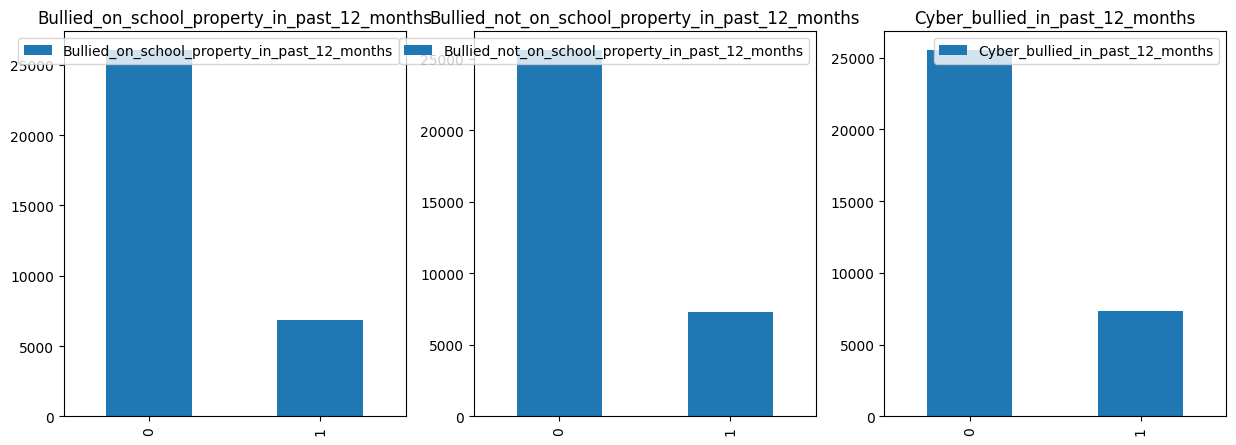

In [ ]:
# Crear tres gráficos diferentes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1
aux_df = pd.DataFrame(df['Bullied_on_school_property_in_past_12_months'].value_counts(sort=False).sort_index())
aux_df.plot(kind='bar', title='Bullied_on_school_property_in_past_12_months', ax=axs[0])

# Gráfico 2
aux_df = pd.DataFrame(df['Bullied_not_on_school_property_in_past_12_months'].value_counts(sort=False).sort_index())
aux_df.plot(kind='bar', title='Bullied_not_on_school_property_in_past_12_months' , ax=axs[1])

# Gráfico 3
aux_df = pd.DataFrame(df['Cyber_bullied_in_past_12_months'].value_counts(sort=False).sort_index())
aux_df.plot(kind='bar', title='Cyber_bullied_in_past_12_months' , ax=axs[2])

# Mostrar los gráficos
plt.show()




In [ ]:
# Contar los valores iguales a 0 y 1 en una columna
no_Bullied_on_school_property_in_past_12_months = df['Bullied_on_school_property_in_past_12_months'].value_counts()[0]
Si_Bullied_on_school_property_in_past_12_months = df['Bullied_on_school_property_in_past_12_months'].value_counts()[1]

# Contar los valores iguales a 0 y 1 en otra columna
NO_Bullied_not_on_school_property_in_past_12_months = df['Bullied_not_on_school_property_in_past_12_months'].value_counts()[0]
SI_Bullied_not_on_school_property_in_past_12_months = df['Bullied_not_on_school_property_in_past_12_months'].value_counts()[1]
# Contar los valores iguales a 0 y 1 en otra columna
NO_Cyber_bullied_in_past_12_months = df['Cyber_bullied_in_past_12_months'].value_counts()[0]
SI_Cyber_bullied_in_past_12_months = df['Cyber_bullied_in_past_12_months'].value_counts()[1]

# Imprimir los resultados
print(f"Número de ceros en Bullied_on_school_property_in_past_12_months: {no_Bullied_on_school_property_in_past_12_months}")
print(f"Número de unos en Bullied_on_school_property_in_past_12_months: {Si_Bullied_on_school_property_in_past_12_months}")
print ("porcetaje ",  round((Si_Bullied_on_school_property_in_past_12_months/(Si_Bullied_on_school_property_in_past_12_months+no_Bullied_on_school_property_in_past_12_months))*100,2 ))
print("-------------------------------")
print(f"Número de ceros en Bullied_not_on_school_property_in_past_12_months: {NO_Bullied_not_on_school_property_in_past_12_months}")
print(f"Número de unos en Bullied_not_on_school_property_in_past_12_months: {SI_Bullied_not_on_school_property_in_past_12_months}")
print ("porcetaje ",  round((SI_Bullied_not_on_school_property_in_past_12_months/(SI_Bullied_not_on_school_property_in_past_12_months+NO_Bullied_not_on_school_property_in_past_12_months))*100,2 ))
print("-------------------------------")
print(f"Número de ceros en Cyber_bullied_in_past_12_months: {NO_Cyber_bullied_in_past_12_months}")
print(f"Número de unos en Cyber_bullied_in_past_12_months: {SI_Cyber_bullied_in_past_12_months}")
print ("porcetaje ",  round((SI_Cyber_bullied_in_past_12_months/(SI_Cyber_bullied_in_past_12_months+NO_Cyber_bullied_in_past_12_months))*100,2 ))


Número de ceros en Bullied_on_school_property_in_past_12_months: 26068
Número de unos en Bullied_on_school_property_in_past_12_months: 6870
porcetaje  20.86
-------------------------------
Número de ceros en Bullied_not_on_school_property_in_past_12_months: 25625
Número de unos en Bullied_not_on_school_property_in_past_12_months: 7313
porcetaje  22.2
-------------------------------
Número de ceros en Cyber_bullied_in_past_12_months: 25558
Número de unos en Cyber_bullied_in_past_12_months: 7380
porcetaje  22.41


In [ ]:
train, test = train_test_split(df, test_size=0.25, shuffle=True, random_state=0)
train, val = train_test_split(train, test_size=0.15, shuffle=True, random_state=0)

print(f'training: {train.shape}')
print(f'test: {test.shape}')

train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)
test.to_csv('./val.csv', sep=';', decimal='.', index=False)

training: (20997, 18)
test: (8235, 18)


In [ ]:
df.describe()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
count,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000,32938.000000
mean,28507.531757,0.208574,0.222023,0.224057,0.372579,0.536736,0.502702,0.680551,1.345832,2.508440,1.137319,2.335448,2.073077,0.163641,0.287571,0.019855,0.294766,0.072439
std,16139.930686,0.406295,0.415613,0.416966,0.483499,0.498656,1.722658,1.926424,1.166598,0.855752,2.330744,1.179191,1.469086,0.369955,0.452637,0.139506,0.455944,0.259218
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14705.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28305.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42265.750000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,3.000000,2.000000,3.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,57095.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,12.000000,4.000000,3.000000,10.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.head().T

,2,5,10,22,23
record,3,6,11,23,24
Bullied_on_school_property_in_past_12_months,0,0,0,0,0
Bullied_not_on_school_property_in_past_12_months,0,0,0,0,0
Cyber_bullied_in_past_12_months,0,0,0,1,0
Custom_Age,1,1,0,1,1
Sex,0,0,0,0,0
Physically_attacked,0,0,0,0,0
Physical_fighting,0,1,1,3,3
Felt_lonely,0,0,0,3,3
Close_friends,3,3,3,3,2


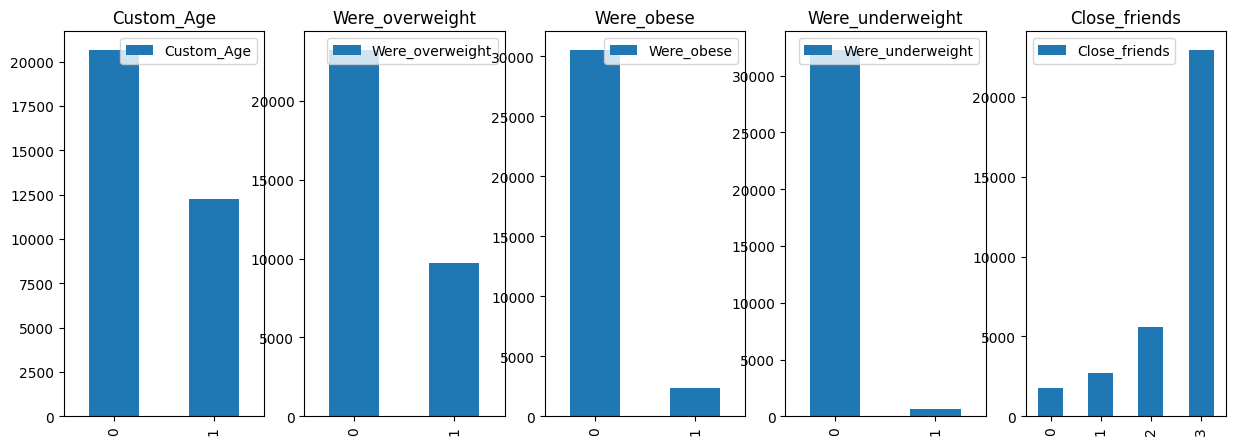

In [ ]:
# Crear tres gráficos diferentes
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

# Gráfico 1
aux_df = pd.DataFrame(df['Custom_Age'].value_counts(sort=False).sort_index())
aux_df.plot(kind='bar', title='Custom_Age', ax=axs[0])
# Gráfico 2
aux_df = pd.DataFrame(df['Were_overweight'].value_counts(sort=False).sort_index())
aux_df.plot(kind='bar', title='Were_overweight' , ax=axs[1])

# Gráfico 3
aux_df = pd.DataFrame(df['Were_obese'].value_counts(sort=False).sort_index())
aux_df.plot(kind='bar', title='Were_obese' , ax=axs[2])

# Gráfico 4
aux_df = pd.DataFrame(df['Were_underweight'].value_counts(sort=False).sort_index())
aux_df.plot(kind='bar', title='Were_underweight' , ax=axs[3])
# Gráfico 5
aux_df = pd.DataFrame(df['Close_friends'].value_counts(sort=False).sort_index())
aux_df.plot(kind='bar', title='Close_friends' , ax=axs[4])


# Mostrar los gráficos
plt.show()



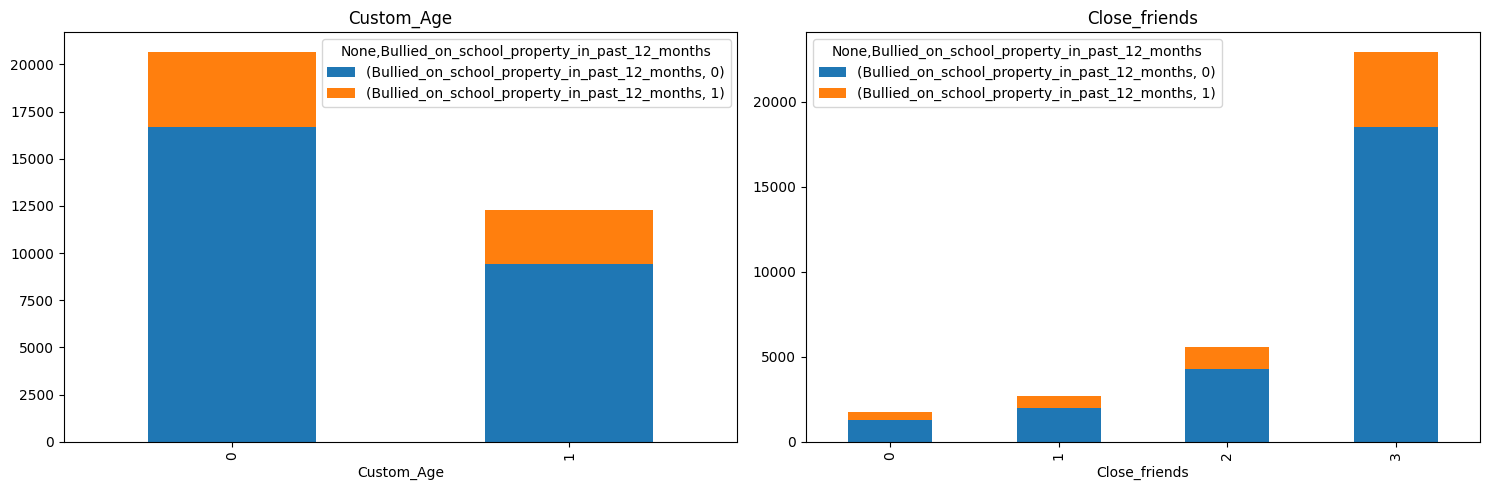

In [ ]:
# Crear tres gráficos diferentes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1
aux_df = pd.DataFrame(df.groupby(['Custom_Age', 'Bullied_on_school_property_in_past_12_months'])['Bullied_on_school_property_in_past_12_months'].count())
aux_df.unstack().plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Custom_Age')

# Gráfico 2
aux_df = pd.DataFrame(df.groupby(['Close_friends', 'Bullied_on_school_property_in_past_12_months'])['Bullied_on_school_property_in_past_12_months'].count())
aux_df.unstack().plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Close_friends')


plt.tight_layout()
plt.show()

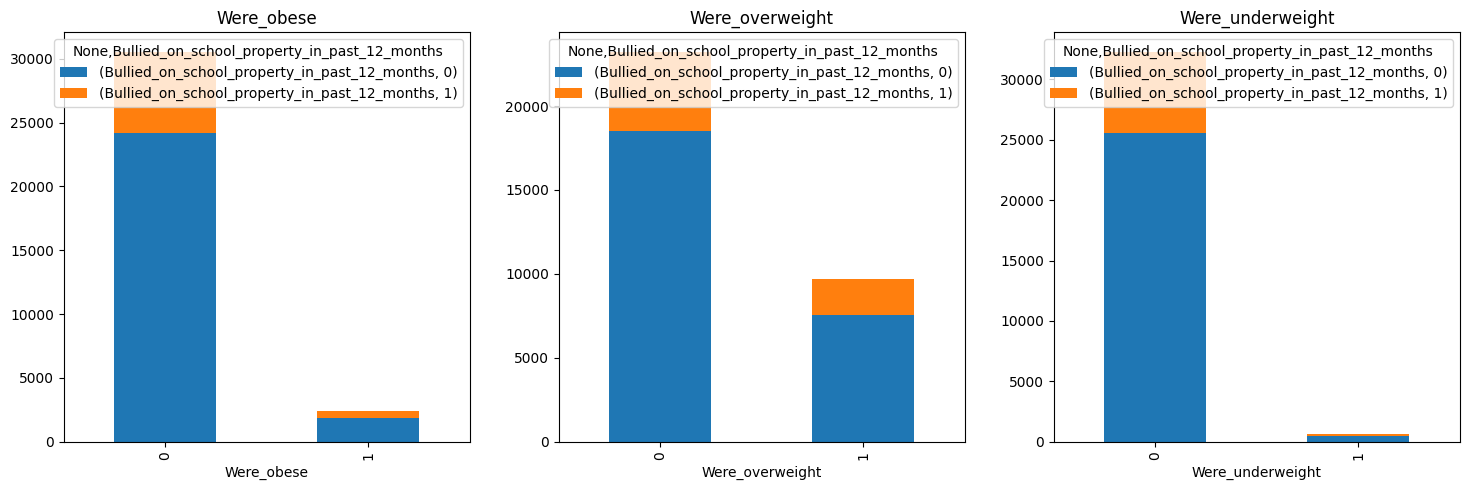

In [ ]:
# Crear tres gráficos diferentes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1
aux_df = pd.DataFrame(df.groupby(['Were_obese', 'Bullied_on_school_property_in_past_12_months'])['Bullied_on_school_property_in_past_12_months'].count())
aux_df.unstack().plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Were_obese')

# Gráfico 2
aux_df = pd.DataFrame(df.groupby(['Were_overweight', 'Bullied_on_school_property_in_past_12_months'])['Bullied_on_school_property_in_past_12_months'].count())
aux_df.unstack().plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Were_overweight')

# Gráfico 3
aux_df = pd.DataFrame(df.groupby(['Were_underweight', 'Bullied_on_school_property_in_past_12_months'])['Bullied_on_school_property_in_past_12_months'].count())
aux_df.unstack().plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('Were_underweight')

plt.tight_layout()
plt.show()

In [ ]:
result_Were_overweight = (df['Bullied_on_school_property_in_past_12_months'] == 1) & (df['Were_overweight'] == 1)
subset = df[result_Were_overweight]
print("Los niños con sobrepeso y que tienen bullyn en el colegio son: " , subset.shape[0])
total_sobrepeso=(df['Were_overweight'] == 1)
s=df[total_sobrepeso]
print(f'Los niños con sobrepeso: {s.shape[0]} \nPor lo tanto el porcentaje anterior nos quedaria {round((subset.shape[0]/s.shape[0])*100, 2)}% ')

Los niños con sobrepeso y que tienen bullyn en el colegio son:  2158
Los niños con sobrepeso: 9709 
Por lo tanto el porcentaje anterior nos quedaria 22.23% 


In [ ]:
result_Were_obese = (df['Bullied_on_school_property_in_past_12_months'] == 1) & (df['Were_obese'] == 1)
subset = df[result_Were_obese]
print("Los niños con obesidad y que tienen bullyn en el colegio son: " , subset.shape[0])
total_obeso=(df['Were_obese'] == 1)
s=df[total_obeso]
print(f'Los niños con sobrepeso: {s.shape[0]} \nPor lo tanto el porcentaje anterior nos quedaria {round((subset.shape[0]/s.shape[0])*100, 2)}% ')

Los niños con obesidad y que tienen bullyn en el colegio son:  542
Los niños con sobrepeso: 2386 
Por lo tanto el porcentaje anterior nos quedaria 22.72% 


In [ ]:
result_Were_underweight = (df['Bullied_on_school_property_in_past_12_months'] == 1) & (df['Were_underweight'] == 1)
subset = df[result_Were_underweight]
print("Los niños por debajo de peso y que tienen bullyn en el colegio son: " , subset.shape[0])
total_delgado=(df['Were_underweight'] == 1)
s=df[total_delgado]
print(f'Los niños por debajo de peso: {s.shape[0]} \nPor lo tanto el porcentaje anterior nos quedaria {round((subset.shape[0]/s.shape[0])*100, 2)}% ')

Los niños por debajo de peso y que tienen bullyn en el colegio son:  152
Los niños por debajo de peso: 654 
Por lo tanto el porcentaje anterior nos quedaria 23.24% 


In [ ]:
print (df[total_sobrepeso].shape[0] )
print (df[total_obeso].shape[0] )
print(df[total_delgado].shape[0] )
df.shape[0]
suma_problema_fisico=df[total_sobrepeso].shape[0]+df[total_obeso].shape[0] +df[total_delgado].shape[0]
print(suma_problema_fisico)
b=152+542+2158
print("bullying recibido por estos niños: ",b )
print(f'resultado de bullyin con problemas fisicos: {round((b/df.shape[0])*100,2)}%' )

9709
2386
654
12749
bullying recibido por estos niños:  2852
resultado de bullyin con problemas fisicos: 8.66%


In [ ]:
df.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
2,3,0,0,0,1,0,0,0,0,3,0,2,4,0,0,0,0,0
5,6,0,0,0,1,0,0,1,0,3,0,3,4,0,0,0,0,0
10,11,0,0,0,0,0,0,1,0,3,5,3,4,0,1,0,0,0
22,23,0,0,1,1,0,0,3,3,3,0,1,4,1,0,0,0,0
23,24,0,0,0,1,0,0,3,3,2,0,4,2,1,0,0,1,1


In [ ]:
cont_bullying=0

cont_fisico=0
cont_amigo=0
cont_solo=0

In [ ]:
df = df.reset_index()

In [ ]:




for i in range(len(df)):
  if df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 1 or df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1 or df.loc[i, 'Cyber_bullied_in_past_12_months'] == 1:
    cont_bullying += 1
    if df.loc[i, 'Were_underweight'] == 1 or df.loc[i, 'Were_overweight'] == 1 or df.loc[i, 'Were_obese'] == 1:
        cont_fisico += 1
    if df.loc[i, 'Close_friends'] <=2 :
        cont_amigo += 1
    if df.loc[i, 'Felt_lonely'] >=3 :
        cont_solo += 1
    
print(cont_bullying)
print(cont_fisico)
print(f'el porcentaje de niños que presentan algun tipo de bullying y tienen algun tipo de problema fisico: {round((cont_fisico/cont_bullying)*100,2)}')
print(f'el porcentaje de niños que presentan algun tipo de bullying y pocos amigos: {round((cont_amigo/cont_bullying)*100,2)}')
print(f'el porcentaje de niños que presentan algun tipo de bullying y solo: {round((cont_solo/cont_bullying)*100,2)}')




13385
4203
el porcentaje de niños que presentan algun tipo de bullying y tienen algun tipo de problema fisico: 31.4
el porcentaje de niños que presentan algun tipo de bullying y pocos amigos: 34.17
el porcentaje de niños que presentan algun tipo de bullying y solo: 26.02


In [ ]:
import matplotlib.pyplot as plt

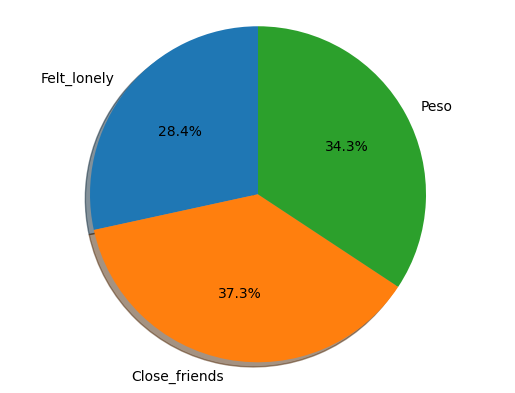

In [ ]:
labels = ['Felt_lonely', 'Close_friends', 'Peso']
sizes = [round((cont_solo/cont_bullying)*100,2), round((cont_amigo/cont_bullying)*100,2), round((cont_fisico/cont_bullying)*100,2)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [ ]:
# Añadimos la nueva columna con ceros
df = df.assign(any_bullying=np.zeros(df.shape[0]))
df

,index,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,any_bullying
0,2,3,0,0,0,1,0,0,0,0,3,0,2,4,0,0,0,0,0,0.0
1,5,6,0,0,0,1,0,0,1,0,3,0,3,4,0,0,0,0,0,0.0
2,10,11,0,0,0,0,0,0,1,0,3,5,3,4,0,1,0,0,0,0.0
3,22,23,0,0,1,1,0,0,3,3,3,0,1,4,1,0,0,0,0,0.0
4,23,24,0,0,0,1,0,0,3,3,2,0,4,2,1,0,0,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32933,56972,57087,0,1,0,0,0,0,0,1,3,5,1,3,0,1,0,0,0,0.0
32934,56974,57089,0,0,0,0,0,0,3,0,3,0,2,4,0,0,0,0,0,0.0
32935,56975,57090,0,0,1,0,0,12,3,1,3,0,3,2,0,0,0,0,0,0.0
32936,56976,57091,0,1,0,0,0,0,5,2,3,0,2,2,0,0,0,1,0,0.0


In [ ]:

for i in range(len(df)):
  if df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 1 or df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1 or df.loc[i, 'Cyber_bullied_in_past_12_months'] == 1:
    df.loc[i, 'any_bullying'] = 1


df

,index,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,any_bullying
0,2,3,0,0,0,1,0,0,0,0,3,0,2,4,0,0,0,0,0,0.0
1,5,6,0,0,0,1,0,0,1,0,3,0,3,4,0,0,0,0,0,0.0
2,10,11,0,0,0,0,0,0,1,0,3,5,3,4,0,1,0,0,0,0.0
3,22,23,0,0,1,1,0,0,3,3,3,0,1,4,1,0,0,0,0,1.0
4,23,24,0,0,0,1,0,0,3,3,2,0,4,2,1,0,0,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32933,56972,57087,0,1,0,0,0,0,0,1,3,5,1,3,0,1,0,0,0,1.0
32934,56974,57089,0,0,0,0,0,0,3,0,3,0,2,4,0,0,0,0,0,0.0
32935,56975,57090,0,0,1,0,0,12,3,1,3,0,3,2,0,0,0,0,0,1.0
32936,56976,57091,0,1,0,0,0,0,5,2,3,0,2,2,0,0,0,1,0,1.0


In [ ]:

df = df.assign(risk_bullying=np.zeros(df.shape[0]))
for i in range(len(df)):
  if df.loc[i, 'any_bullying'] == 1:
    df.loc[i, 'risk_bullying'] = df.loc[i, 'Bullied_on_school_property_in_past_12_months'] + df.loc[i, 'Bullied_not_on_school_property_in_past_12_months']  + df.loc[i, 'Cyber_bullied_in_past_12_months']

In [ ]:
df = df.drop('record', axis=1)

In [ ]:
df

,index,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,any_bullying,risk_bullying
0,2,0,0,0,1,0,0,0,0,3,0,2,4,0,0,0,0,0,0.0,0.0
1,5,0,0,0,1,0,0,1,0,3,0,3,4,0,0,0,0,0,0.0,0.0
2,10,0,0,0,0,0,0,1,0,3,5,3,4,0,1,0,0,0,0.0,0.0
3,22,0,0,1,1,0,0,3,3,3,0,1,4,1,0,0,0,0,1.0,1.0
4,23,0,0,0,1,0,0,3,3,2,0,4,2,1,0,0,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32933,56972,0,1,0,0,0,0,0,1,3,5,1,3,0,1,0,0,0,1.0,1.0
32934,56974,0,0,0,0,0,0,3,0,3,0,2,4,0,0,0,0,0,0.0,0.0
32935,56975,0,0,1,0,0,12,3,1,3,0,3,2,0,0,0,0,0,1.0,1.0
32936,56976,0,1,0,0,0,0,5,2,3,0,2,2,0,0,0,1,0,1.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
#Preparamos los datos y las etiquetas en esta primera parte no utilizo las imagenes, por lo tanto me lo quito del dataset
x = df.drop(labels=['Bullied_on_school_property_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months', 'Cyber_bullied_in_past_12_months','any_bullying','risk_bullying'], axis=1)
print(x.head())
y=df['risk_bullying']
print(y)

   index  Custom_Age  Sex  Physically_attacked  Physical_fighting  \
0      2           1    0                    0                  0   
1      5           1    0                    0                  1   
2     10           0    0                    0                  1   
3     22           1    0                    0                  3   
4     23           1    0                    0                  3   

   Felt_lonely  Close_friends  Miss_school_no_permission  \
0            0              3                          0   
1            0              3                          0   
2            0              3                          5   
3            3              3                          0   
4            3              2                          0   

   Other_students_kind_and_helpful  Parents_understand_problems  \
0                                2                            4   
1                                3                            4   
2                      

In [ ]:
#Preparamos los datos y las etiquetas en esta primera parte no utilizo las imagenes, por lo tanto me lo quito del dataset
x = df.drop(labels=['Bullied_on_school_property_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months', 'Cyber_bullied_in_past_12_months','any_bullying','risk_bullying'], axis=1)
print(x.head())
y=df['risk_bullying']
print(y)

   index  Custom_Age  Sex  Physically_attacked  Physical_fighting  \
0      2           1    0                    0                  0   
1      5           1    0                    0                  1   
2     10           0    0                    0                  1   
3     22           1    0                    0                  3   
4     23           1    0                    0                  3   

   Felt_lonely  Close_friends  Miss_school_no_permission  \
0            0              3                          0   
1            0              3                          0   
2            0              3                          5   
3            3              3                          0   
4            3              2                          0   

   Other_students_kind_and_helpful  Parents_understand_problems  \
0                                2                            4   
1                                3                            4   
2                      

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)

x

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.26519007e-05, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.40405069e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99912247e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99929797e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

# Comprobar el tamaño del dataset
print("El conjunto de entrenamiento tiene dimensiones: ", x_train.shape)
print("El conjunto de validación tiene dimensiones: ",x_val.shape)
print("El conjunto de test tiene dimensiones: ",x_test.shape)
print("\n")
print("El conjunto de entrenamiento tiene dimensiones: ", y_train.shape)
print("El conjunto de validación tiene dimensiones: ",y_val.shape)
print("El conjunto de test tiene dimensiones: ",y_test.shape)

El conjunto de entrenamiento tiene dimensiones:  (25197, 15)
El conjunto de validación tiene dimensiones:  (2800, 15)
El conjunto de test tiene dimensiones:  (4941, 15)


El conjunto de entrenamiento tiene dimensiones:  (25197,)
El conjunto de validación tiene dimensiones:  (2800,)
El conjunto de test tiene dimensiones:  (4941,)


In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from pandas.core.common import flatten
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
y_train

17745    0.0
22338    0.0
7521     3.0
30111    1.0
9464     0.0
        ... 
27495    0.0
32282    0.0
16596    0.0
22289    0.0
29037    2.0
Name: risk_bullying, Length: 25197, dtype: float64

In [ ]:
from keras.utils import to_categorical
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


x_train.shape
y_train.shape


(25197, 4)

[INFO]: Entrenando red neuronal...
Epoch 1/100
126/126 [==============================] - 6s 6ms/step - loss: 1.3667 - accuracy: 0.4619 - val_loss: 1.3433 - val_accuracy: 0.6086
Epoch 2/100
126/126 [==============================] - 1s 4ms/step - loss: 1.3295 - accuracy: 0.5941 - val_loss: 1.3066 - val_accuracy: 0.6086
Epoch 3/100
126/126 [==============================] - 1s 4ms/step - loss: 1.2944 - accuracy: 0.5942 - val_loss: 1.2705 - val_accuracy: 0.6086
Epoch 4/100
126/126 [==============================] - 1s 4ms/step - loss: 1.2610 - accuracy: 0.5942 - val_loss: 1.2355 - val_accuracy: 0.6086
Epoch 5/100
126/126 [==============================] - 1s 4ms/step - loss: 1.2298 - accuracy: 0.5942 - val_loss: 1.2038 - val_accuracy: 0.6086
Epoch 6/100
126/126 [==============================] - 1s 4ms/step - loss: 1.2020 - accuracy: 0.5942 - val_loss: 1.1765 - val_accuracy: 0.6086
Epoch 7/100
126/126 [==============================] - 1s 4ms/step - loss: 1.1788 - accuracy: 0.5942 - val_

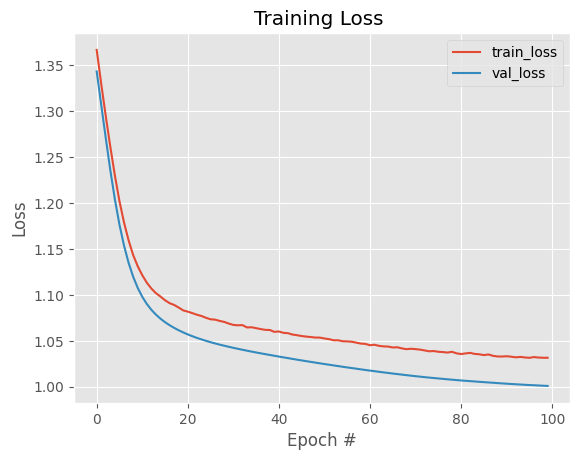

In [ ]:

activation_function_final = 'softmax'
learning_rate = 0.001
num_epochs = 100
batch_size = 200

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(4, activation=activation_function_final))
  # Compilamos y entrenamos el modelo SGD
print("[INFO]: Entrenando red neuronal...")
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate), metrics=["accuracy"])

  # Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

  # Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
y_test

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:

# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

155/155 [==============================] - 0s 2ms/step
Precisión: 58.25%


In [ ]:
predicted_labels


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:

# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[2878    0    0    0]
 [1149    0    0    0]
 [ 573    0    0    0]
 [ 341    0    0    0]]

Classification report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.74      2878
           1       0.00      0.00      0.00      1149
           2       0.00      0.00      0.00       573
           3       0.00      0.00      0.00       341

    accuracy                           0.58      4941
   macro avg       0.15      0.25      0.18      4941
weighted avg       0.34      0.58      0.43      4941

Accuracy score: 0.5825


In [ ]:
res_sin = df.loc[df['risk_bullying'] == 0]
res_1 = df.loc[df['risk_bullying'] == 1]
res_2 = df.loc[df['risk_bullying'] == 2]
res_3 = df.loc[df['risk_bullying'] == 3]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df.shape[0])}' )

sin bullying: (19553, 20) 59.36304572226607
con 1 bullying: (7423, 20) 22.53628028417026
con 2 bullying: (3746, 20)11.372882385087134
con 3 bullying: (2216, 20) 6.727791608476531


In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
def Balance(df):
  cont_0 =0
  cont_1=0
  cont_2=0

  for index, row in df.iterrows():
    if cont_0 < 17000 and row['risk_bullying']==0 :
        df = df.drop(index)
        cont_0+=1
    if cont_1 < 4000 and row['risk_bullying']==1 :
        df = df.drop(index)
        cont_1+=1
    if cont_2 < 1000 and row['risk_bullying']==2 :
        df = df.drop(index)
        cont_2+=1
  return df

In [ ]:
df_balanced = Balance(df)

In [ ]:
res_sin = df_balanced.loc[df['risk_bullying'] == 0]
res_1 = df_balanced.loc[df['risk_bullying'] == 1]
res_2 = df_balanced.loc[df['risk_bullying'] == 2]
res_3 = df_balanced.loc[df['risk_bullying'] == 3]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df_balanced.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df_balanced.shape[0])}' )

sin bullying: (2553, 20) 23.340647284695557
con 1 bullying: (3423, 20) 31.294569391113548
con 2 bullying: (2746, 20)25.10513805083196
con 3 bullying: (2216, 20) 20.25964527335893


In [ ]:
x = df_balanced.drop(labels=['Bullied_on_school_property_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months', 'Cyber_bullied_in_past_12_months','any_bullying','risk_bullying'], axis=1)
print(x.head())
y=df_balanced['risk_bullying']
print(y)

    index  Custom_Age  Sex  Physically_attacked  Physical_fighting  \
40     96           0    1                    1                  1   
55    121           1    1                    0                  0   
60    128           1    1                   11                  1   
93    173           0    1                    0                  3   
94    174           0    1                    3                  0   

    Felt_lonely  Close_friends  Miss_school_no_permission  \
40            2              3                          0   
55            3              1                          0   
60            4              3                          0   
93            3              0                          2   
94            4              0                          0   

    Other_students_kind_and_helpful  Parents_understand_problems  \
40                                2                            4   
55                                4                            4   
60      

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)


In [ ]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

In [ ]:
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

[INFO]: Entrenando red neuronal...
Epoch 1/250
42/42 [==============================] - 1s 9ms/step - loss: 1.3793 - accuracy: 0.3110 - val_loss: 1.3688 - val_accuracy: 0.3344
Epoch 2/250
42/42 [==============================] - 0s 4ms/step - loss: 1.3727 - accuracy: 0.3127 - val_loss: 1.3624 - val_accuracy: 0.3344
Epoch 3/250
42/42 [==============================] - 0s 4ms/step - loss: 1.3687 - accuracy: 0.3129 - val_loss: 1.3577 - val_accuracy: 0.3344
Epoch 4/250
42/42 [==============================] - 0s 5ms/step - loss: 1.3626 - accuracy: 0.3128 - val_loss: 1.3513 - val_accuracy: 0.3344
Epoch 5/250
42/42 [==============================] - 0s 5ms/step - loss: 1.3562 - accuracy: 0.3135 - val_loss: 1.3406 - val_accuracy: 0.3344
Epoch 6/250
42/42 [==============================] - 0s 4ms/step - loss: 1.3456 - accuracy: 0.3244 - val_loss: 1.3274 - val_accuracy: 0.3538
Epoch 7/250
42/42 [==============================] - 0s 5ms/step - loss: 1.3317 - accuracy: 0.3399 - val_loss: 1.3098 -

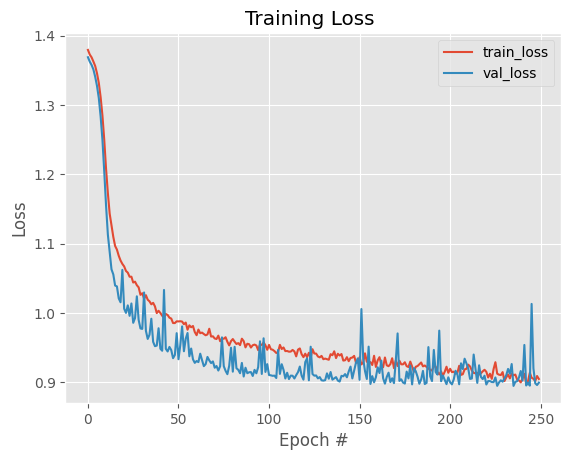

In [ ]:

activation_function_final = 'softmax'
learning_rate = 0.03
num_epochs = 250
batch_size = 200

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(4, activation=activation_function_final))
  # Compilamos y entrenamos el modelo SGD
print("[INFO]: Entrenando red neuronal...")
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate), metrics=["accuracy"])

  # Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

  # Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

52/52 [==============================] - 0s 2ms/step
Precisión: 60.27%


In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[2878    0    0    0]
 [1149    0    0    0]
 [ 573    0    0    0]
 [ 341    0    0    0]]

Classification report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.74      2878
           1       0.00      0.00      0.00      1149
           2       0.00      0.00      0.00       573
           3       0.00      0.00      0.00       341

    accuracy                           0.58      4941
   macro avg       0.15      0.25      0.18      4941
weighted avg       0.34      0.58      0.43      4941

Accuracy score: 0.5825


In [ ]:
df

,index,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,any_bullying,risk_bullying
0,2,0,0,0,1,0,0,0,0,3,0,2,4,0,0,0,0,0,0.0,0.0
1,5,0,0,0,1,0,0,1,0,3,0,3,4,0,0,0,0,0,0.0,0.0
2,10,0,0,0,0,0,0,1,0,3,5,3,4,0,1,0,0,0,0.0,0.0
3,22,0,0,1,1,0,0,3,3,3,0,1,4,1,0,0,0,0,1.0,1.0
4,23,0,0,0,1,0,0,3,3,2,0,4,2,1,0,0,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32933,56972,0,1,0,0,0,0,0,1,3,5,1,3,0,1,0,0,0,1.0,1.0
32934,56974,0,0,0,0,0,0,3,0,3,0,2,4,0,0,0,0,0,0.0,0.0
32935,56975,0,0,1,0,0,12,3,1,3,0,3,2,0,0,0,0,0,1.0,1.0
32936,56976,0,1,0,0,0,0,5,2,3,0,2,2,0,0,0,1,0,1.0,1.0


In [ ]:
df = df.assign(bullying=np.zeros(df.shape[0]))
df

,index,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,any_bullying,risk_bullying,bullying
0,2,0,0,0,1,0,0,0,0,3,0,2,4,0,0,0,0,0,0.0,0.0,0.0
1,5,0,0,0,1,0,0,1,0,3,0,3,4,0,0,0,0,0,0.0,0.0,0.0
2,10,0,0,0,0,0,0,1,0,3,5,3,4,0,1,0,0,0,0.0,0.0,0.0
3,22,0,0,1,1,0,0,3,3,3,0,1,4,1,0,0,0,0,1.0,1.0,0.0
4,23,0,0,0,1,0,0,3,3,2,0,4,2,1,0,0,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32933,56972,0,1,0,0,0,0,0,1,3,5,1,3,0,1,0,0,0,1.0,1.0,0.0
32934,56974,0,0,0,0,0,0,3,0,3,0,2,4,0,0,0,0,0,0.0,0.0,0.0
32935,56975,0,0,1,0,0,12,3,1,3,0,3,2,0,0,0,0,0,1.0,1.0,0.0
32936,56976,0,1,0,0,0,0,5,2,3,0,2,2,0,0,0,1,0,1.0,1.0,0.0


In [ ]:
for i in range(len(df)):
  if df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 0 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 0 and df.loc[i, 'Cyber_bullied_in_past_12_months'] == 0:
    df.loc[i, 'bullying'] = 0
  if df.loc[i, 'Cyber_bullied_in_past_12_months'] == 1 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 0 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 0 :
    df.loc[i, 'bullying'] = 1   
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 0 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 1 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 0 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 0 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 0 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 1 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 1 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 0 :
    df.loc[i, 'bullying'] = 3
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 1 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 0 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1 :
    df.loc[i, 'bullying'] = 3
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 0 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 1 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1 :
    df.loc[i, 'bullying'] = 3
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 1 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 1 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1 :
    df.loc[i, 'bullying'] = 4

In [ ]:
df

,index,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,any_bullying,risk_bullying,bullying
0,2,0,0,0,1,0,0,0,0,3,0,2,4,0,0,0,0,0,0.0,0.0,0.0
1,5,0,0,0,1,0,0,1,0,3,0,3,4,0,0,0,0,0,0.0,0.0,0.0
2,10,0,0,0,0,0,0,1,0,3,5,3,4,0,1,0,0,0,0.0,0.0,0.0
3,22,0,0,1,1,0,0,3,3,3,0,1,4,1,0,0,0,0,1.0,1.0,1.0
4,23,0,0,0,1,0,0,3,3,2,0,4,2,1,0,0,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32933,56972,0,1,0,0,0,0,0,1,3,5,1,3,0,1,0,0,0,1.0,1.0,2.0
32934,56974,0,0,0,0,0,0,3,0,3,0,2,4,0,0,0,0,0,0.0,0.0,0.0
32935,56975,0,0,1,0,0,12,3,1,3,0,3,2,0,0,0,0,0,1.0,1.0,1.0
32936,56976,0,1,0,0,0,0,5,2,3,0,2,2,0,0,0,1,0,1.0,1.0,2.0


In [ ]:
res_sin = df.loc[df['bullying'] == 0]
res_1 = df.loc[df['bullying'] == 1]
res_2 = df.loc[df['bullying'] == 2]
res_3 = df.loc[df['bullying'] == 3]
res_4 = df.loc[df['bullying'] == 4]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df.shape[0])}\ncon 4 bullying: {res_4.shape} {100*(res_3.shape[0]/df.shape[0])}' )

sin bullying: (19553, 21) 59.36304572226607
con 1 bullying: (2750, 21) 8.349019369724937
con 2 bullying: (4673, 21)14.187260914445321
con 3 bullying: (3746, 21) 11.372882385087134
con 4 bullying: (2216, 21) 11.372882385087134


In [ ]:
def Balance2(df):
  cont=0
  cont2=0

  for index, row in df.iterrows():
    if cont < 16000 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
    if cont2 < 1000 and row['bullying']==2 :
        df = df.drop(index)
        cont2+=1
  return df

In [ ]:
df_balanced2 = Balance2(df)

df_balanced2


,index,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,any_bullying,risk_bullying,bullying
3,22,0,0,1,1,0,0,3,3,3,0,1,4,1,0,0,0,0,1.0,1.0,1.0
8,39,0,0,1,1,1,0,1,1,3,0,3,3,0,0,0,0,0,1.0,1.0,1.0
9,41,1,0,1,1,0,0,1,1,3,0,3,3,0,0,0,1,0,1.0,2.0,3.0
14,48,0,0,1,1,1,0,0,1,3,0,2,2,0,0,0,0,0,1.0,1.0,1.0
17,52,0,1,1,1,1,0,3,1,3,2,2,3,0,1,0,1,0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32933,56972,0,1,0,0,0,0,0,1,3,5,1,3,0,1,0,0,0,1.0,1.0,2.0
32934,56974,0,0,0,0,0,0,3,0,3,0,2,4,0,0,0,0,0,0.0,0.0,0.0
32935,56975,0,0,1,0,0,12,3,1,3,0,3,2,0,0,0,0,0,1.0,1.0,1.0
32936,56976,0,1,0,0,0,0,5,2,3,0,2,2,0,0,0,1,0,1.0,1.0,2.0


In [ ]:
res_sin = df_balanced2.loc[df_balanced2['bullying'] == 0]
res_1 = df_balanced2.loc[df_balanced2['bullying'] == 1]
res_2 = df_balanced2.loc[df_balanced2['bullying'] == 2]
res_3 = df_balanced2.loc[df_balanced2['bullying'] == 3]
res_4 = df_balanced2.loc[df_balanced2['bullying'] == 4]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced2.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced2.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df_balanced2.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df_balanced2.shape[0])}\ncon 4 bullying: {res_4.shape} {100*(res_4.shape[0]/df_balanced2.shape[0])}' )

sin bullying: (3553, 21) 22.292633956581753
con 1 bullying: (2750, 21) 17.2543606475091
con 2 bullying: (3673, 21)23.045551512109423
con 3 bullying: (3746, 21) 23.503576358388756
con 4 bullying: (2216, 21) 13.903877525410968


In [ ]:
#Otro Modelo

In [ ]:
x = df_balanced2.drop(labels=['Bullied_on_school_property_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months', 'Cyber_bullied_in_past_12_months','any_bullying','risk_bullying','bullying'], axis=1)
print(x.head())
y=df_balanced2['bullying']
print(y)

    index  Custom_Age  Sex  Physically_attacked  Physical_fighting  \
3      22           1    0                    0                  3   
8      39           1    1                    0                  1   
9      41           1    0                    0                  1   
14     48           1    1                    0                  0   
17     52           1    1                    0                  3   

    Felt_lonely  Close_friends  Miss_school_no_permission  \
3             3              3                          0   
8             1              3                          0   
9             1              3                          0   
14            1              3                          0   
17            1              3                          2   

    Other_students_kind_and_helpful  Parents_understand_problems  \
3                                 1                            4   
8                                 3                            3   
9       

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
num_classes = 5
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

[INFO]: Entrenando red neuronal...
Epoch 1/300
61/61 [==============================] - 2s 8ms/step - loss: 1.6065 - accuracy: 0.2174 - val_loss: 1.5999 - val_accuracy: 0.2384
Epoch 2/300
61/61 [==============================] - 0s 4ms/step - loss: 1.5992 - accuracy: 0.2256 - val_loss: 1.5936 - val_accuracy: 0.2384
Epoch 3/300
61/61 [==============================] - 0s 4ms/step - loss: 1.5939 - accuracy: 0.2291 - val_loss: 1.5890 - val_accuracy: 0.2428
Epoch 4/300
61/61 [==============================] - 0s 4ms/step - loss: 1.5898 - accuracy: 0.2332 - val_loss: 1.5848 - val_accuracy: 0.2465
Epoch 5/300
61/61 [==============================] - 0s 4ms/step - loss: 1.5853 - accuracy: 0.2436 - val_loss: 1.5805 - val_accuracy: 0.2649
Epoch 6/300
61/61 [==============================] - 0s 4ms/step - loss: 1.5808 - accuracy: 0.2486 - val_loss: 1.5757 - val_accuracy: 0.2731
Epoch 7/300
61/61 [==============================] - 0s 4ms/step - loss: 1.5765 - accuracy: 0.2677 - val_loss: 1.5706 -

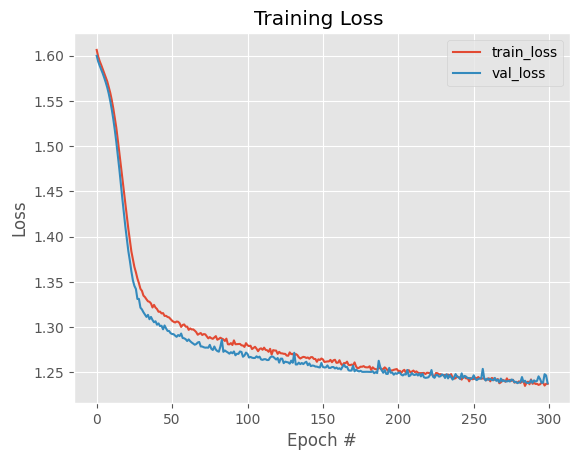

In [ ]:

activation_function_final = 'softmax'
learning_rate = 0.01
num_epochs = 300
batch_size = 200

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(5, activation=activation_function_final))
  # Compilamos y entrenamos el modelo SGD
print("[INFO]: Entrenando red neuronal...")
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate), metrics=["accuracy"])

  # Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

  # Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

75/75 [==============================] - 0s 2ms/step
Precisión: 46.68%


In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[511   3   5  11   0]
 [ 64   4 156 157   2]
 [125   4 333 100   0]
 [ 87   0 234 264   8]
 [ 47   0 114 158   4]]

Classification report:
              precision    recall  f1-score   support

           0       0.61      0.96      0.75       530
           1       0.36      0.01      0.02       383
           2       0.40      0.59      0.47       562
           3       0.38      0.45      0.41       593
           4       0.29      0.01      0.02       323

    accuracy                           0.47      2391
   macro avg       0.41      0.40      0.34      2391
weighted avg       0.42      0.47      0.39      2391

Accuracy score: 0.4668


En la matriz de confusión mostrada, la primera fila indica los valores para la clase "0", la segunda fila para la clase "1", la tercera fila para la clase "2", la cuarta fila para la clase "3" y la quinta fila para la clase "4". Por ejemplo, en la primera columna, el modelo ha predicho 324 valores de la clase "0" correctamente (verdaderos positivos), no ha predicho ningún valor de la clase "0" como perteneciente a otras clases (falsos positivos), y ha predicho incorrectamente 19 valores de otras clases como pertenecientes a la clase "0" (falsos negativos).

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

[INFO]: Entrenando red neuronal...
Epoch 1/250
122/122 [==============================] - 3s 6ms/step - loss: 7.1676 - accuracy: 0.2232 - val_loss: 6.2778 - val_accuracy: 0.2303
Epoch 2/250
122/122 [==============================] - 1s 5ms/step - loss: 5.5820 - accuracy: 0.2384 - val_loss: 4.9437 - val_accuracy: 0.2797
Epoch 3/250
122/122 [==============================] - 1s 5ms/step - loss: 4.4474 - accuracy: 0.2808 - val_loss: 3.9904 - val_accuracy: 0.3004
Epoch 4/250
122/122 [==============================] - 1s 5ms/step - loss: 3.6373 - accuracy: 0.3204 - val_loss: 3.3096 - val_accuracy: 0.3683
Epoch 5/250
122/122 [==============================] - 1s 5ms/step - loss: 3.0582 - accuracy: 0.3620 - val_loss: 2.8197 - val_accuracy: 0.3838
Epoch 6/250
122/122 [==============================] - 1s 4ms/step - loss: 2.6378 - accuracy: 0.3797 - val_loss: 2.4551 - val_accuracy: 0.3956
Epoch 7/250
122/122 [==============================] - 1s 5ms/step - loss: 2.3170 - accuracy: 0.3944 - val_

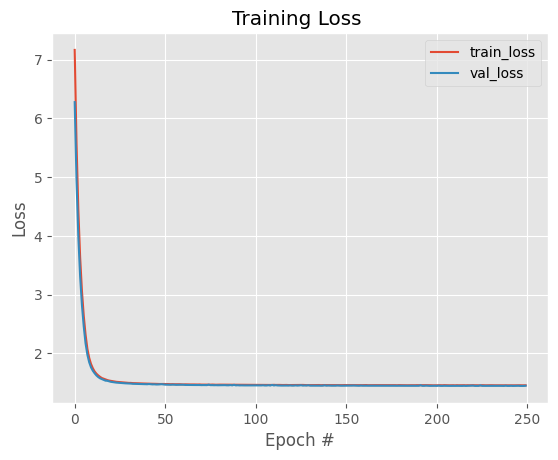

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.0001
num_epochs = 250
batch_size = 100

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(5, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

75/75 [==============================] - 0s 2ms/step
Precisión: 44.04%


In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[455   0  75   0   0]
 [ 49   0 131 203   0]
 [117   0 257 188   0]
 [ 79   0 173 341   0]
 [ 42   0  99 182   0]]

Classification report:
              precision    recall  f1-score   support

           0       0.61      0.86      0.72       530
           1       0.00      0.00      0.00       383
           2       0.35      0.46      0.40       562
           3       0.37      0.58      0.45       593
           4       0.00      0.00      0.00       323

    accuracy                           0.44      2391
   macro avg       0.27      0.38      0.31      2391
weighted avg       0.31      0.44      0.36      2391

Accuracy score: 0.4404


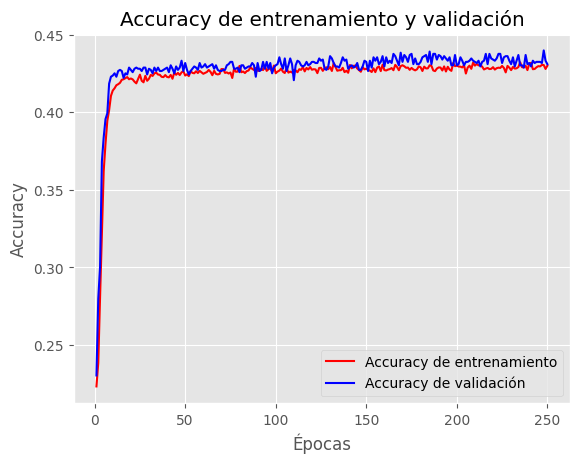

In [ ]:
import matplotlib.pyplot as plt

# Entrenar el modelo y guardar el historial en la variable 'history'

# Obtener los valores del accuracy de entrenamiento y validación
train_acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

# Obtener la cantidad de épocas
epochs = range(1, len(train_acc) + 1)

# Graficar el accuracy de entrenamiento y validación
plt.plot(epochs, train_acc, 'r', label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()







In [ ]:
#Cambio las clases

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 0 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 0 and df.loc[i, 'Cyber_bullied_in_past_12_months'] == 0:
    df.loc[i, 'bullying'] = 0
  if df.loc[i, 'Cyber_bullied_in_past_12_months'] == 1 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 0 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 0 :
    df.loc[i, 'bullying'] = 1   
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 0 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 1 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 0 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 0 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 0 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 1 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 1 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 0 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 1 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 0 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 0 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 1 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 1 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 1 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1 :
    df.loc[i, 'bullying'] = 3

In [ ]:
res_sin = df.loc[df['bullying'] == 0]
res_1 = df.loc[df['bullying'] == 1]
res_2 = df.loc[df['bullying'] == 2]
res_3 = df.loc[df['bullying'] == 3]

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df.shape[0])}' )

sin bullying: (19553, 21) 59.36304572226607
con 1 bullying: (2750, 21) 8.349019369724937
con 2 bullying: (8419, 21)25.560143299532456
con 3 bullying: (2216, 21) 6.727791608476531


In [ ]:
def Balance3(df):
  cont=0
  cont2=0
  cont1=0

  for index, row in df.iterrows():
    if cont < 17300 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
    if cont1 < 500 and row['bullying']==1 :
        df = df.drop(index)
        cont1+=1
    if cont2 < 6200 and row['bullying']==2 :
        df = df.drop(index)
        cont2+=1
  return df

In [ ]:
df_balanced3 = Balance3(df)

df_balanced3

,index,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,any_bullying,risk_bullying,bullying
40,96,1,1,1,0,1,1,1,2,3,0,2,4,0,0,0,0,0,1.0,3.0,3.0
55,121,1,1,1,1,1,0,0,3,1,0,4,4,1,0,0,1,0,1.0,3.0,3.0
60,128,1,1,1,1,1,11,1,4,3,0,2,3,1,0,0,0,0,1.0,3.0,3.0
93,173,1,1,1,0,1,0,3,3,0,2,1,0,1,1,0,0,0,1.0,3.0,3.0
94,174,1,1,1,0,1,3,0,4,0,0,1,1,1,0,0,0,0,1.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32933,56972,0,1,0,0,0,0,0,1,3,5,1,3,0,1,0,0,0,1.0,1.0,2.0
32934,56974,0,0,0,0,0,0,3,0,3,0,2,4,0,0,0,0,0,0.0,0.0,0.0
32935,56975,0,0,1,0,0,12,3,1,3,0,3,2,0,0,0,0,0,1.0,1.0,1.0
32936,56976,0,1,0,0,0,0,5,2,3,0,2,2,0,0,0,1,0,1.0,1.0,2.0


In [ ]:
res_sin = df_balanced3.loc[df['bullying'] == 0]
res_1 = df_balanced3.loc[df['bullying'] == 1]
res_2 = df_balanced3.loc[df['bullying'] == 2]
res_3 = df_balanced3.loc[df['bullying'] == 3]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced3.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced3.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df_balanced3.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df_balanced3.shape[0])}' )

sin bullying: (2253, 21) 25.20698142761244
con 1 bullying: (2250, 21) 25.1734168717834
con 2 bullying: (2219, 21)24.826583128216605
con 3 bullying: (2216, 21) 24.79301857238756


In [ ]:
x = df_balanced3.drop(labels=['Bullied_on_school_property_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months', 'Cyber_bullied_in_past_12_months','any_bullying','risk_bullying','bullying'], axis=1)
print(x.head())
y=df_balanced3['bullying']
print(y)

    index  Custom_Age  Sex  Physically_attacked  Physical_fighting  \
40     96           0    1                    1                  1   
55    121           1    1                    0                  0   
60    128           1    1                   11                  1   
93    173           0    1                    0                  3   
94    174           0    1                    3                  0   

    Felt_lonely  Close_friends  Miss_school_no_permission  \
40            2              3                          0   
55            3              1                          0   
60            4              3                          0   
93            3              0                          2   
94            4              0                          0   

    Other_students_kind_and_helpful  Parents_understand_problems  \
40                                2                            4   
55                                4                            4   
60      

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

[INFO]: Entrenando red neuronal...
Epoch 1/300
12/12 [==============================] - 3s 25ms/step - loss: 7.8189 - accuracy: 0.2711 - val_loss: 7.6947 - val_accuracy: 0.2727
Epoch 2/300
12/12 [==============================] - 0s 7ms/step - loss: 7.6084 - accuracy: 0.2917 - val_loss: 7.4883 - val_accuracy: 0.3052
Epoch 3/300
12/12 [==============================] - 0s 7ms/step - loss: 7.4047 - accuracy: 0.3007 - val_loss: 7.2886 - val_accuracy: 0.3117
Epoch 4/300
12/12 [==============================] - 0s 9ms/step - loss: 7.2079 - accuracy: 0.3032 - val_loss: 7.0952 - val_accuracy: 0.2987
Epoch 5/300
12/12 [==============================] - 0s 7ms/step - loss: 7.0168 - accuracy: 0.3339 - val_loss: 6.9082 - val_accuracy: 0.3052
Epoch 6/300
12/12 [==============================] - 0s 9ms/step - loss: 6.8334 - accuracy: 0.3119 - val_loss: 6.7279 - val_accuracy: 0.3019
Epoch 7/300
12/12 [==============================] - 0s 7ms/step - loss: 6.6547 - accuracy: 0.3271 - val_loss: 6.5530 

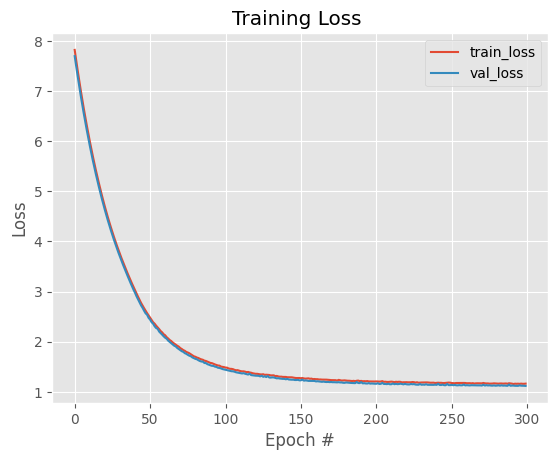

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.0001
num_epochs = 300
batch_size = 250

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(4, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

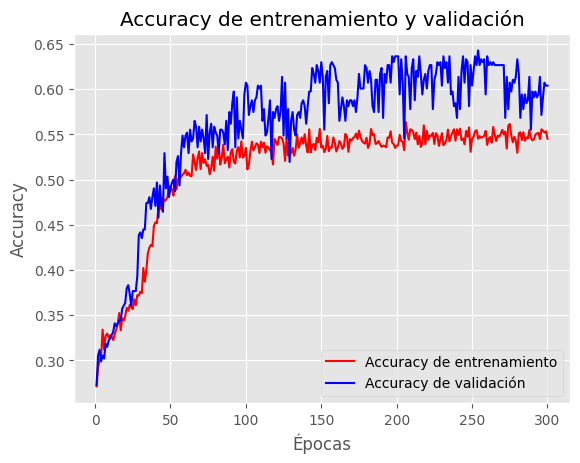

In [ ]:
# Entrenar el modelo y guardar el historial en la variable 'history'

# Obtener los valores del accuracy de entrenamiento y validación
train_acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

# Obtener la cantidad de épocas
epochs = range(1, len(train_acc) + 1)

# Graficar el accuracy de entrenamiento y validación
plt.plot(epochs, train_acc, 'r', label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

17/17 [==============================] - 0s 2ms/step
Precisión: 56.07%


In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[114   0  10   0]
 [ 11  23  39  88]
 [ 38   4  89   0]
 [  6  15  28  79]]

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.92      0.78       124
           1       0.55      0.14      0.23       161
           2       0.54      0.68      0.60       131
           3       0.47      0.62      0.54       128

    accuracy                           0.56       544
   macro avg       0.56      0.59      0.53       544
weighted avg       0.56      0.56      0.51       544

Accuracy score: 0.5607


Para la clase 0, el modelo predijo correctamente 284 instancias de un total de 333 (85%). El modelo clasificó incorrectamente 2 instancias de la clase 1 como clase 0 y 47 instancias de la clase 2 como clase 0.
Para la clase 1, el modelo predijo correctamente 87 instancias de un total de 325 (27%). El modelo clasificó incorrectamente 34 instancias de la clase 0 como clase 1, 69 instancias de la clase 2 como clase 1, y 135 instancias de la clase 3 como clase 1.
Para la clase 2, el modelo predijo correctamente 196 instancias de un total de 354 (55%). El modelo clasificó incorrectamente 123 instancias de la clase 0 como clase 2 y 35 instancias de la clase 1 como clase 2.
Para la clase 3, el modelo predijo correctamente 174 instancias de un total de 329 (53%). El modelo clasificó incorrectamente 22 instancias de la clase 0 como clase 3, 86 instancias de la clase 1 como clase 3 y 47 instancias de la clase 2 como clase 3.

In [ ]:

y_test

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

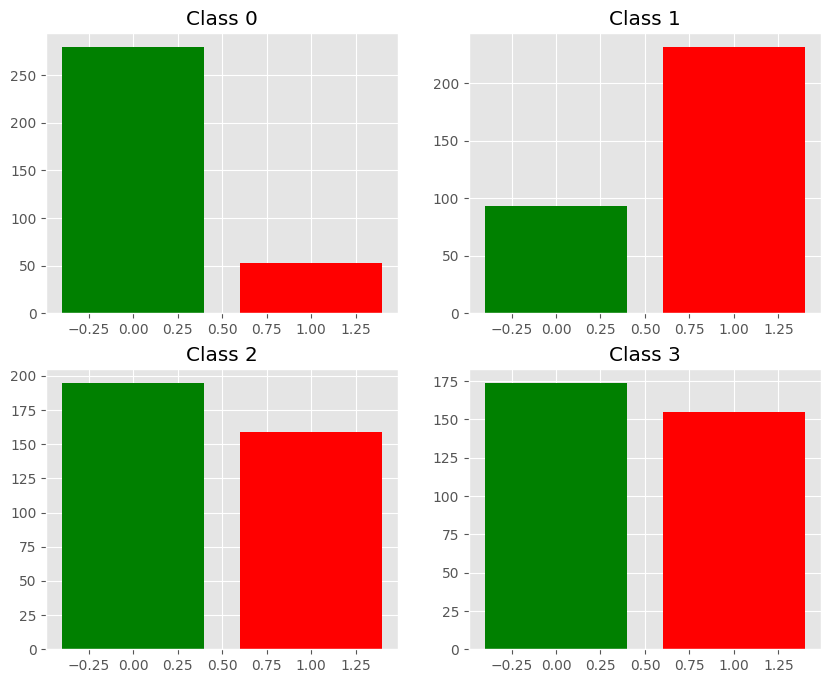

In [ ]:
# asumimos que 'y_true' son las etiquetas verdaderas y 'y_pred' son las predicciones del modelo
y_true = np.argmax(y_test, axis=1)
y_pred = predicted_labels

# obtenemos los índices de las predicciones correctas e incorrectas para cada clase
indices_class0_correct = np.where((y_true == 0) & (y_pred == 0))[0]
indices_class0_incorrect = np.where((y_true == 0) & (y_pred != 0))[0]

indices_class1_correct = np.where((y_true == 1) & (y_pred == 1))[0]
indices_class1_incorrect = np.where((y_true == 1) & (y_pred != 1))[0]

indices_class2_correct = np.where((y_true == 2) & (y_pred == 2))[0]
indices_class2_incorrect = np.where((y_true == 2) & (y_pred != 2))[0]

indices_class3_correct = np.where((y_true == 3) & (y_pred == 3))[0]
indices_class3_incorrect = np.where((y_true == 3) & (y_pred != 3))[0]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# clase 0
axs[0, 0].bar([0, 1], [len(indices_class0_correct), len(indices_class0_incorrect)], color=['green', 'red'])
axs[0, 0].set_title('Class 0')

# clase 1
axs[0, 1].bar([0, 1], [len(indices_class1_correct), len(indices_class1_incorrect)], color=['green', 'red'])
axs[0, 1].set_title('Class 1')

# clase 2
axs[1, 0].bar([0, 1], [len(indices_class2_correct), len(indices_class2_incorrect)], color=['green', 'red'])
axs[1, 0].set_title('Class 2')

# clase 3
axs[1, 1].bar([0, 1], [len(indices_class3_correct), len(indices_class3_incorrect)], color=['green', 'red'])
axs[1, 1].set_title('Class 3')

plt.show()

# Realizamos un modelo con Cyber como variable

In [ ]:
df['bullying'] = 0

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 0:
    if df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 0: 
      df.loc[i, 'bullying'] = 0
    if df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1:
      df.loc[i, 'bullying'] = 1   
  if df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 1: 
    if df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1 :
      df.loc[i, 'bullying'] = 2
    if df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 0 :
      df.loc[i, 'bullying'] = 1
 




In [ ]:
res_sin = df.loc[df['bullying'] == 0]
res_1 = df.loc[df['bullying'] == 1]
res_2 = df.loc[df['bullying'] == 2]
print(df.shape)
print(res_sin.shape[0]+res_1.shape[0]+res_2.shape[0])

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df.shape[0])}' )

(32938, 21)
32938
sin bullying: (22303, 21) 67.71206509199101
con 1 bullying: (7087, 21) 21.51618191754205
con 2 bullying: (3548, 21)10.771752990466938


In [ ]:
def Balance4(df):
  cont=0
  
  cont1=0

  for index, row in df.iterrows():
    if cont < 18600 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
    if cont1 < 3600 and row['bullying']==1 :
        df = df.drop(index)
        cont1+=1
  return df

In [ ]:
df_balanced4 = Balance4(df)

df_balanced4

,index,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,any_bullying,risk_bullying,bullying
40,96,1,1,1,0,1,1,1,2,3,0,2,4,0,0,0,0,0,1.0,3.0,2
55,121,1,1,1,1,1,0,0,3,1,0,4,4,1,0,0,1,0,1.0,3.0,2
60,128,1,1,1,1,1,11,1,4,3,0,2,3,1,0,0,0,0,1.0,3.0,2
83,162,1,1,0,0,0,0,0,0,3,0,2,1,0,0,0,1,1,1.0,2.0,2
90,170,1,1,0,0,1,0,0,3,2,0,3,4,1,0,0,1,0,1.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32933,56972,0,1,0,0,0,0,0,1,3,5,1,3,0,1,0,0,0,1.0,1.0,1
32934,56974,0,0,0,0,0,0,3,0,3,0,2,4,0,0,0,0,0,0.0,0.0,0
32935,56975,0,0,1,0,0,12,3,1,3,0,3,2,0,0,0,0,0,1.0,1.0,0
32936,56976,0,1,0,0,0,0,5,2,3,0,2,2,0,0,0,1,0,1.0,1.0,1


In [ ]:
res_sin = df_balanced4.loc[df_balanced4['bullying'] == 0]
res_1 = df_balanced4.loc[df_balanced4['bullying'] == 1]
res_2 = df_balanced4.loc[df_balanced4['bullying'] == 2]

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced4.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced4.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df_balanced4.shape[0])}' )

sin bullying: (3703, 21) 34.485006518904825
con 1 bullying: (3487, 21) 32.473458744645185
con 2 bullying: (3548, 21)33.04153473644999


In [ ]:
df_balanced4.head()

,index,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,any_bullying,risk_bullying,bullying
40,96,1,1,1,0,1,1,1,2,3,0,2,4,0,0,0,0,0,1.0,3.0,2
55,121,1,1,1,1,1,0,0,3,1,0,4,4,1,0,0,1,0,1.0,3.0,2
60,128,1,1,1,1,1,11,1,4,3,0,2,3,1,0,0,0,0,1.0,3.0,2
83,162,1,1,0,0,0,0,0,0,3,0,2,1,0,0,0,1,1,1.0,2.0,2
90,170,1,1,0,0,1,0,0,3,2,0,3,4,1,0,0,1,0,1.0,2.0,2


In [ ]:
x = df_balanced4.drop(labels=['Bullied_on_school_property_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months','bullying','any_bullying','risk_bullying'], axis=1)
print(x.head())
y=df_balanced4['bullying']
print(y)

    index  Cyber_bullied_in_past_12_months  Custom_Age  Sex  \
40     96                                1           0    1   
55    121                                1           1    1   
60    128                                1           1    1   
83    162                                0           0    0   
90    170                                0           0    1   

    Physically_attacked  Physical_fighting  Felt_lonely  Close_friends  \
40                    1                  1            2              3   
55                    0                  0            3              1   
60                   11                  1            4              3   
83                    0                  0            0              3   
90                    0                  0            3              2   

    Miss_school_no_permission  Other_students_kind_and_helpful  \
40                          0                                2   
55                          0               

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
num_classes = 3
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
num_classes = len(np.unique(y_train))
num_classes

2

[INFO]: Entrenando red neuronal...
Epoch 1/300
42/42 [==============================] - 3s 9ms/step - loss: 6.0960 - accuracy: 0.4462 - val_loss: 4.6673 - val_accuracy: 0.5553
Epoch 2/300
42/42 [==============================] - 0s 5ms/step - loss: 3.7837 - accuracy: 0.5459 - val_loss: 2.9329 - val_accuracy: 0.6013
Epoch 3/300
42/42 [==============================] - 0s 5ms/step - loss: 2.4834 - accuracy: 0.6125 - val_loss: 2.0196 - val_accuracy: 0.6484
Epoch 4/300
42/42 [==============================] - 0s 5ms/step - loss: 1.8035 - accuracy: 0.6595 - val_loss: 1.5623 - val_accuracy: 0.6627
Epoch 5/300
42/42 [==============================] - 0s 5ms/step - loss: 1.4643 - accuracy: 0.6605 - val_loss: 1.3642 - val_accuracy: 0.6243
Epoch 6/300
42/42 [==============================] - 0s 6ms/step - loss: 1.2671 - accuracy: 0.6648 - val_loss: 1.1810 - val_accuracy: 0.6594
Epoch 7/300
42/42 [==============================] - 0s 8ms/step - loss: 1.1489 - accuracy: 0.6713 - val_loss: 1.0697 -

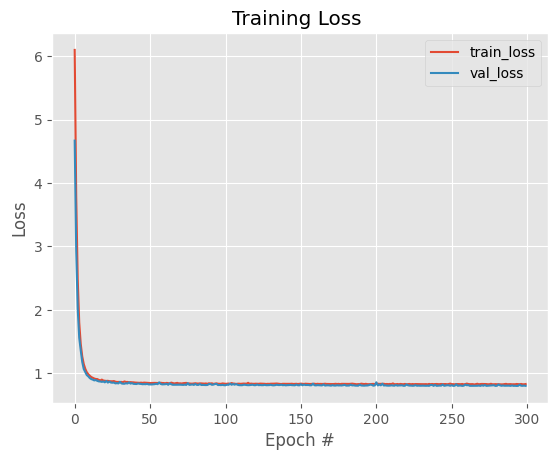

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.0005
num_epochs = 300
batch_size = 200

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(3, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

51/51 [==============================] - 0s 3ms/step
Precisión: 71.26%


In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[511  54   0]
 [144 291  48]
 [ 46 171 346]]

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       565
           1       0.56      0.60      0.58       483
           2       0.88      0.61      0.72       563

    accuracy                           0.71      1611
   macro avg       0.72      0.71      0.70      1611
weighted avg       0.73      0.71      0.71      1611

Accuracy score: 0.7126


En la clase 0, el modelo tiene una precisión del 73% y un recall del 88%, lo que indica que el modelo es bueno para identificar la mayoría de las instancias positivas de la clase 0, pero aún hay un número considerable de instancias que son falsos negativos (clasificadas como negativas). En la clase 1, el modelo tiene una precisión del 55% y un recall del 50%, lo que indica que el modelo tiene dificultades para identificar tanto las instancias positivas como las negativas de la clase 1. En la clase 2, el modelo tiene una precisión del 79% y un recall del 69%, lo que indica que el modelo es bueno para identificar la mayoría de las instancias positivas de la clase 2, pero aún hay un número considerable de instancias que son falsos negativos.

En términos generales, el modelo tiene una precisión ponderada del 70% y una sensibilidad ponderada del 69%. El puntaje de precisión y sensibilidad ponderados tiene en cuenta el desequilibrio de clase en los datos y se calcula como el promedio ponderado de la precisión o sensibilidad para cada clase. Por último, el modelo tiene una precisión global del 70.14% (accuracy score).

En cuanto a los fallos del modelo, se puede observar que está confundiendo las instancias de la clase 1 con la clase 2, lo que se puede ver en la matriz de confusión. El modelo clasificó incorrectamente 139 instancias de la clase 1 como la clase 2, y 101 instancias de la clase 2 como la clase 1.

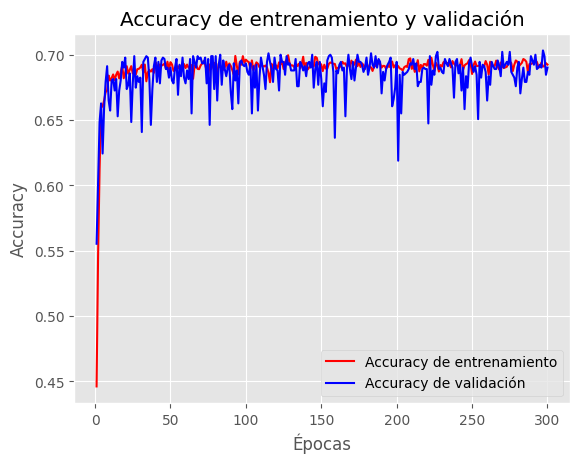

In [ ]:
# Entrenar el modelo y guardar el historial en la variable 'history'

# Obtener los valores del accuracy de entrenamiento y validación
train_acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

# Obtener la cantidad de épocas
epochs = range(1, len(train_acc) + 1)

# Graficar el accuracy de entrenamiento y validación
plt.plot(epochs, train_acc, 'r', label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Despues de os datos obtenidos llegos a la conclusion de que no existe diferencia entre los bullying fuera o dentro del colegio, por lo que vamos a generar un modelo para precisar estos datos

In [ ]:
df['bullying'] = 0

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 0:
    if df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 0: 
      df.loc[i, 'bullying'] = 0
    if df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1:
      df.loc[i, 'bullying'] = 1   
  if df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 1: 
    if df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1 :
      df.loc[i, 'bullying'] = 1
    if df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 0 :
      df.loc[i, 'bullying'] = 1
 

In [ ]:
res_sin = df.loc[df['bullying'] == 0]
res_1 = df.loc[df['bullying'] == 1]

print(df.shape)
print(res_sin.shape[0]+res_1.shape[0]+res_2.shape[0])

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df.shape[0])}' )

(32938, 21)
36486
sin bullying: (22303, 21) 67.71206509199101
con 1 bullying: (10635, 21) 32.287934908008985


In [ ]:
def Balance6(df):
  cont=0
  
  cont1=0

  for index, row in df.iterrows():
    if cont < 10000 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
 
  return df

In [ ]:
df_balanced6 = Balance6(df)

df_balanced6

,index,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,any_bullying,risk_bullying,bullying
9,41,1,0,1,1,0,0,1,1,3,0,3,3,0,0,0,1,0,1.0,2.0,1
10,42,1,0,0,0,0,1,0,0,3,0,0,2,0,0,0,0,0,1.0,1.0,1
12,45,1,0,0,1,1,0,0,2,3,0,1,4,0,0,0,0,0,1.0,1.0,1
17,52,0,1,1,1,1,0,3,1,3,2,2,3,0,1,0,1,0,1.0,2.0,1
18,54,0,1,1,0,0,5,3,3,0,10,2,4,1,1,0,0,0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32933,56972,0,1,0,0,0,0,0,1,3,5,1,3,0,1,0,0,0,1.0,1.0,1
32934,56974,0,0,0,0,0,0,3,0,3,0,2,4,0,0,0,0,0,0.0,0.0,0
32935,56975,0,0,1,0,0,12,3,1,3,0,3,2,0,0,0,0,0,1.0,1.0,0
32936,56976,0,1,0,0,0,0,5,2,3,0,2,2,0,0,0,1,0,1.0,1.0,1


In [ ]:
res_sin = df_balanced6.loc[df_balanced6['bullying'] == 0]
res_1 = df_balanced6.loc[df_balanced6['bullying'] == 1]


print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced6.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced6.shape[0])}' )

sin bullying: (12303, 21) 53.63588804603714
con 1 bullying: (10635, 21) 46.364111953962855


In [ ]:
x = df_balanced6.drop(labels=['Bullied_on_school_property_in_past_12_months', 'Bullied_not_on_school_property_in_past_12_months','bullying','any_bullying','risk_bullying'], axis=1)
print(x.head())
y=df_balanced6['bullying']
print(y)

    index  Cyber_bullied_in_past_12_months  Custom_Age  Sex  \
9      41                                1           1    0   
10     42                                0           0    0   
12     45                                0           1    1   
17     52                                1           1    1   
18     54                                1           0    0   

    Physically_attacked  Physical_fighting  Felt_lonely  Close_friends  \
9                     0                  1            1              3   
10                    1                  0            0              3   
12                    0                  0            2              3   
17                    0                  3            1              3   
18                    5                  3            3              0   

    Miss_school_no_permission  Other_students_kind_and_helpful  \
9                           0                                3   
10                          0               

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
num_classes = 2
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

[INFO]: Entrenando red neuronal...
Epoch 1/300
147/147 [==============================] - 3s 8ms/step - loss: 7.0769 - accuracy: 0.5414 - val_loss: 6.9470 - val_accuracy: 0.5303
Epoch 2/300
147/147 [==============================] - 1s 5ms/step - loss: 6.8225 - accuracy: 0.5454 - val_loss: 6.6978 - val_accuracy: 0.5318
Epoch 3/300
147/147 [==============================] - 1s 6ms/step - loss: 6.5780 - accuracy: 0.5500 - val_loss: 6.4577 - val_accuracy: 0.5462
Epoch 4/300
147/147 [==============================] - 1s 6ms/step - loss: 6.3428 - accuracy: 0.5670 - val_loss: 6.2266 - val_accuracy: 0.5805
Epoch 5/300
147/147 [==============================] - 1s 6ms/step - loss: 6.1165 - accuracy: 0.5918 - val_loss: 6.0041 - val_accuracy: 0.6231
Epoch 6/300
147/147 [==============================] - 1s 4ms/step - loss: 5.8984 - accuracy: 0.6251 - val_loss: 5.7894 - val_accuracy: 0.6497
Epoch 7/300
147/147 [==============================] - 1s 4ms/step - loss: 5.6884 - accuracy: 0.6498 - val_

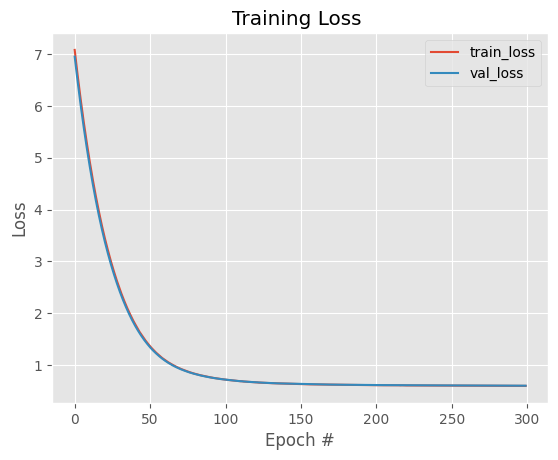

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.00001
num_epochs = 300
batch_size = 120

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(2, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

108/108 [==============================] - 0s 2ms/step
Precisión: 77.94%


In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[1575  230]
 [ 529 1107]]

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1805
           1       0.83      0.68      0.74      1636

    accuracy                           0.78      3441
   macro avg       0.79      0.77      0.78      3441
weighted avg       0.79      0.78      0.78      3441

Accuracy score: 0.7794


En el caso de la matriz de confusión proporcionada, la clase 0 se refiere a los verdaderos negativos y la clase 1 se refiere a los verdaderos positivos. Los valores en la diagonal principal (1580 y 1104) representan las predicciones correctas de cada clase, mientras que los valores fuera de la diagonal principal representan las predicciones incorrectas.

En este caso, podemos ver que el modelo ha predicho correctamente 1580 instancias de la clase 0 (verdaderos negativos) y 1104 instancias de la clase 1 (verdaderos positivos). Sin embargo, también ha cometido 225 falsos positivos (clasificando como positivo cuando en realidad es negativo) y 532 falsos negativos (clasificando como negativo cuando en realidad es positivo).

El informe de clasificación proporciona medidas de rendimiento adicionales del modelo, como precisión, sensibilidad y f1-score para cada clase y un promedio ponderado de estas medidas para todas las clases. La precisión se refiere a la proporción de instancias que fueron correctamente clasificadas como positivas (en este caso, clase 1) sobre todas las instancias que el modelo clasificó como positivas. La sensibilidad, también conocida como recall, se refiere a la proporción de instancias positivas que el modelo identificó correctamente. La f1-score es una medida combinada de precisión y sensibilidad.

En general, el modelo tiene una precisión del 75% para la clase 0 y una sensibilidad del 88%. Para la clase 1, el modelo tiene una precisión del 83% y una sensibilidad del 67%. El accuracy score indica que el modelo tiene una precisión general del 78%, lo que significa que el modelo clasificó correctamente el 78% de todas las instancias.

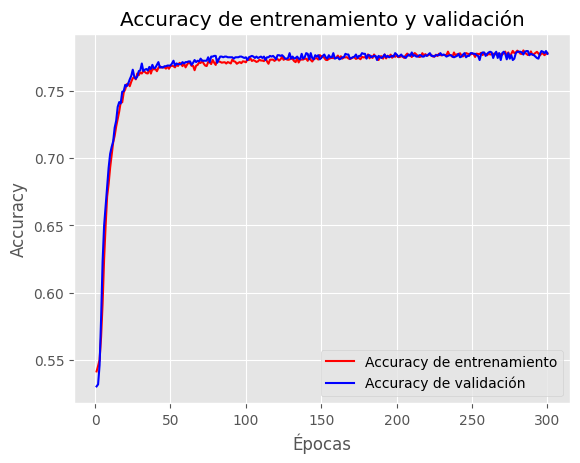

In [ ]:
# Entrenar el modelo y guardar el historial en la variable 'history'

# Obtener los valores del accuracy de entrenamiento y validación
train_acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

# Obtener la cantidad de épocas
epochs = range(1, len(train_acc) + 1)

# Graficar el accuracy de entrenamiento y validación
plt.plot(epochs, train_acc, 'r', label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Realizamos dos modelos por genero

In [ ]:
df.head()

,index,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,any_bullying,risk_bullying,bullying
0,2,0,0,0,1,0,0,0,0,3,0,2,4,0,0,0,0,0,0.0,0.0,0
1,5,0,0,0,1,0,0,1,0,3,0,3,4,0,0,0,0,0,0.0,0.0,0
2,10,0,0,0,0,0,0,1,0,3,5,3,4,0,1,0,0,0,0.0,0.0,0
3,22,0,0,1,1,0,0,3,3,3,0,1,4,1,0,0,0,0,1.0,1.0,0
4,23,0,0,0,1,0,0,3,3,2,0,4,2,1,0,0,1,1,0.0,0.0,0


In [ ]:
df['bullying'] = 0

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 0 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 0 and df.loc[i, 'Cyber_bullied_in_past_12_months'] == 0:
    df.loc[i, 'bullying'] = 0
  if df.loc[i, 'Cyber_bullied_in_past_12_months'] == 1 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 0 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 0 :
    df.loc[i, 'bullying'] = 1   
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 0 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 1 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 0 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 0 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 0 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 1 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 1 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 0 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 1 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 0 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 0 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 1 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1 :
    df.loc[i, 'bullying'] = 2
  if  df.loc[i, 'Cyber_bullied_in_past_12_months'] == 1 and df.loc[i, 'Bullied_on_school_property_in_past_12_months'] == 1 and df.loc[i, 'Bullied_not_on_school_property_in_past_12_months'] == 1 :
    df.loc[i, 'bullying'] = 3

In [ ]:
chicos = df[df['Sex'] == 0]
chicas = df[df['Sex'] == 1]
print(f'el dataset de niños: {chicos.shape}\nel datset de las niñas: {chicas.shape}')

el dataset de niños: (15259, 21)
el datset de las niñas: (17679, 21)


In [ ]:
res_sin = chicos.loc[chicos['bullying'] == 0]
res_1 = chicos.loc[chicos['bullying'] == 1]
res_2 = chicos.loc[chicos['bullying'] == 2]
res_3 = chicos.loc[chicos['bullying'] == 3]

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/chicos.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/chicos.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/chicos.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/chicos.shape[0])}' )

sin bullying: (9927, 21) 65.05668785634707
con 1 bullying: (886, 21) 5.806409332197392
con 2 bullying: (3697, 21)24.228324267645323
con 3 bullying: (749, 21) 4.9085785438102105


In [ ]:
def Balance5_o(df):
  cont=0
  cont1=0
  cont2=0

  for index, row in df.iterrows():
    if cont < 9150 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
    if cont1 < 100 and row['bullying']==1 :
        df = df.drop(index)
        cont1+=1
    if cont2 < 2900 and row['bullying']==2 :
        df = df.drop(index)
        cont2+=1
  return df


In [ ]:
df_balanced5_o = Balance5_o(chicos)

df_balanced5_o

,index,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,any_bullying,risk_bullying,bullying
110,194,1,1,1,0,0,0,0,1,1,0,3,2,0,0,0,0,0,1.0,3.0,3
114,200,1,1,1,0,0,0,0,0,2,0,2,0,0,0,0,0,0,1.0,3.0,3
124,217,1,1,1,0,0,0,0,2,3,0,4,0,0,0,0,1,1,1.0,3.0,3
125,218,1,1,1,0,0,12,11,2,2,2,3,2,0,1,0,0,0,1.0,3.0,3
149,262,1,1,1,1,0,0,0,2,0,2,1,2,0,1,0,1,1,1.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32932,56971,1,1,0,0,0,0,0,3,3,0,2,1,1,0,0,0,0,1.0,2.0,2
32933,56972,0,1,0,0,0,0,0,1,3,5,1,3,0,1,0,0,0,1.0,1.0,2
32934,56974,0,0,0,0,0,0,3,0,3,0,2,4,0,0,0,0,0,0.0,0.0,0
32935,56975,0,0,1,0,0,12,3,1,3,0,3,2,0,0,0,0,0,1.0,1.0,1


In [ ]:
res_sin = df_balanced5_o.loc[df_balanced5_o['bullying'] == 0]
res_1 = df_balanced5_o.loc[df_balanced5_o['bullying'] == 1]
res_2 = df_balanced5_o.loc[df_balanced5_o['bullying'] == 2]
res_3 = df_balanced5_o.loc[df_balanced5_o['bullying'] == 3]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced5_o.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced5_o.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df_balanced5_o.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df_balanced5_o.shape[0])}' )

sin bullying: (777, 21) 24.991958829205533
con 1 bullying: (786, 21) 25.28144097780637
con 2 bullying: (797, 21)25.635252492762945
con 3 bullying: (749, 21) 24.091347700225153


In [ ]:
x = df_balanced5_o.drop(labels=['Bullied_on_school_property_in_past_12_months', 'Cyber_bullied_in_past_12_months','Bullied_not_on_school_property_in_past_12_months','bullying','any_bullying','risk_bullying'], axis=1)
print(x.head())
y=df_balanced5_o['bullying']
print(y)

     index  Custom_Age  Sex  Physically_attacked  Physical_fighting  \
110    194           0    0                    0                  0   
114    200           0    0                    0                  0   
124    217           0    0                    0                  0   
125    218           0    0                   12                 11   
149    262           1    0                    0                  0   

     Felt_lonely  Close_friends  Miss_school_no_permission  \
110            1              1                          0   
114            0              2                          0   
124            2              3                          0   
125            2              2                          2   
149            2              0                          2   

     Other_students_kind_and_helpful  Parents_understand_problems  \
110                                3                            2   
114                                2                          

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

[INFO]: Entrenando red neuronal...
Epoch 1/400
10/10 [==============================] - 2s 27ms/step - loss: 7.8440 - accuracy: 0.2482 - val_loss: 7.7381 - val_accuracy: 0.2755
Epoch 2/400
10/10 [==============================] - 0s 8ms/step - loss: 7.6674 - accuracy: 0.2907 - val_loss: 7.5648 - val_accuracy: 0.3132
Epoch 3/400
10/10 [==============================] - 0s 8ms/step - loss: 7.4954 - accuracy: 0.3159 - val_loss: 7.3954 - val_accuracy: 0.3132
Epoch 4/400
10/10 [==============================] - 0s 7ms/step - loss: 7.3274 - accuracy: 0.3366 - val_loss: 7.2301 - val_accuracy: 0.3321
Epoch 5/400
10/10 [==============================] - 0s 8ms/step - loss: 7.1639 - accuracy: 0.3437 - val_loss: 7.0691 - val_accuracy: 0.3472
Epoch 6/400
10/10 [==============================] - 0s 8ms/step - loss: 7.0051 - accuracy: 0.3500 - val_loss: 6.9123 - val_accuracy: 0.3547
Epoch 7/400
10/10 [==============================] - 0s 7ms/step - loss: 6.8497 - accuracy: 0.3635 - val_loss: 6.7594 

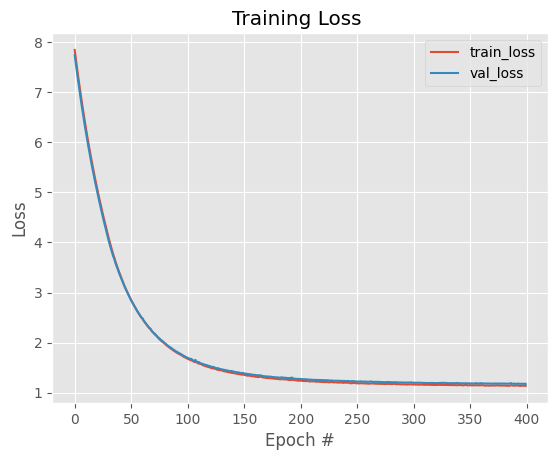

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.0001
num_epochs = 400
batch_size = 260

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(4, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

15/15 [==============================] - 0s 2ms/step
Precisión: 53.96%


In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[86  0 19  0]
 [13 16 23 78]
 [36  3 70  0]
 [ 4 13 26 80]]

Classification report:
              precision    recall  f1-score   support

           0       0.62      0.82      0.70       105
           1       0.50      0.12      0.20       130
           2       0.51      0.64      0.57       109
           3       0.51      0.65      0.57       123

    accuracy                           0.54       467
   macro avg       0.53      0.56      0.51       467
weighted avg       0.53      0.54      0.50       467

Accuracy score: 0.5396


In [ ]:
res_sin = chicas.loc[chicas['bullying'] == 0]
res_1 = chicas.loc[chicas['bullying'] == 1]
res_2 = chicas.loc[chicas['bullying'] == 2]
res_3 = chicas.loc[chicas['bullying'] == 3]

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/chicas.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/chicos.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/chicas.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/chicas.shape[0])}' )

sin bullying: (9626, 21) 54.448781039651564
con 1 bullying: (1864, 21) 12.215741529589096
con 2 bullying: (4722, 21)26.709655523502462
con 3 bullying: (1467, 21) 8.297980655014424


In [ ]:
def Balance7_o(df):
  cont=0
  
  cont2=0

  for index, row in df.iterrows():
    if cont < 8000 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
    if cont2 < 3000 and row['bullying']==2 :
        df = df.drop(index)
        cont2+=1
  return df

In [ ]:
df_balanced7_o = Balance7_o(chicas)

df_balanced7_o

,index,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,any_bullying,risk_bullying,bullying
8,39,0,0,1,1,1,0,1,1,3,0,3,3,0,0,0,0,0,1.0,1.0,1
14,48,0,0,1,1,1,0,0,1,3,0,2,2,0,0,0,0,0,1.0,1.0,1
23,60,0,0,1,0,1,0,0,4,3,0,2,3,1,0,0,0,0,1.0,1.0,1
40,96,1,1,1,0,1,1,1,2,3,0,2,4,0,0,0,0,0,1.0,3.0,3
44,106,0,0,1,0,1,0,0,2,3,0,2,1,0,0,0,1,1,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32918,56942,1,1,0,1,1,0,0,2,3,9,3,1,0,1,0,1,0,1.0,2.0,2
32923,56953,0,0,0,0,1,0,1,2,2,2,2,1,0,1,0,1,1,0.0,0.0,0
32926,56957,0,0,1,0,1,3,3,1,3,0,4,0,0,0,0,0,0,1.0,1.0,1
32928,56965,1,1,0,0,1,0,0,2,2,0,2,3,0,0,0,0,0,1.0,2.0,2


In [ ]:
res_sin = df_balanced7_o.loc[df_balanced7_o['bullying'] == 0]
res_1 = df_balanced7_o.loc[df_balanced7_o['bullying'] == 1]
res_2 = df_balanced7_o.loc[df_balanced7_o['bullying'] == 2]
res_3 = df_balanced7_o.loc[df_balanced7_o['bullying'] == 3]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced7_o.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced7_o.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df_balanced7_o.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df_balanced7_o.shape[0])}' )

sin bullying: (1626, 21) 24.34496182063183
con 1 bullying: (1864, 21) 27.90836951639467
con 2 bullying: (1722, 21)25.78230273993113
con 3 bullying: (1467, 21) 21.964365923042372


In [ ]:
x = df_balanced7_o.drop(labels=['Bullied_on_school_property_in_past_12_months', 'Cyber_bullied_in_past_12_months','Bullied_not_on_school_property_in_past_12_months','bullying','any_bullying','risk_bullying'], axis=1)
print(x.head())
y=df_balanced7_o['bullying']
print(y)

    index  Custom_Age  Sex  Physically_attacked  Physical_fighting  \
8      39           1    1                    0                  1   
14     48           1    1                    0                  0   
23     60           0    1                    0                  0   
40     96           0    1                    1                  1   
44    106           0    1                    0                  0   

    Felt_lonely  Close_friends  Miss_school_no_permission  \
8             1              3                          0   
14            1              3                          0   
23            4              3                          0   
40            2              3                          0   
44            2              3                          0   

    Other_students_kind_and_helpful  Parents_understand_problems  \
8                                 3                            3   
14                                2                            2   
23      

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

[INFO]: Entrenando red neuronal...
Epoch 1/300
43/43 [==============================] - 3s 9ms/step - loss: 5.1725 - accuracy: 0.3568 - val_loss: 3.1916 - val_accuracy: 0.3961
Epoch 2/300
43/43 [==============================] - 0s 5ms/step - loss: 2.4044 - accuracy: 0.4228 - val_loss: 1.8006 - val_accuracy: 0.4366
Epoch 3/300
43/43 [==============================] - 0s 5ms/step - loss: 1.5993 - accuracy: 0.4721 - val_loss: 1.4298 - val_accuracy: 0.4982
Epoch 4/300
43/43 [==============================] - 0s 5ms/step - loss: 1.3942 - accuracy: 0.4835 - val_loss: 1.3085 - val_accuracy: 0.5141
Epoch 5/300
43/43 [==============================] - 0s 6ms/step - loss: 1.3086 - accuracy: 0.4962 - val_loss: 1.2768 - val_accuracy: 0.4683
Epoch 6/300
43/43 [==============================] - 0s 6ms/step - loss: 1.2688 - accuracy: 0.4972 - val_loss: 1.2382 - val_accuracy: 0.5000
Epoch 7/300
43/43 [==============================] - 0s 5ms/step - loss: 1.2508 - accuracy: 0.5019 - val_loss: 1.2264 -

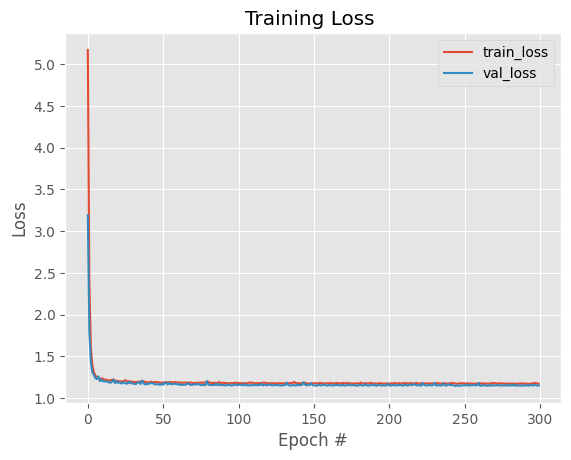

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.001
num_epochs = 300
batch_size = 120

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(4, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

32/32 [==============================] - 0s 2ms/step
Precisión: 52.40%


In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[180   0  56   0]
 [ 39 174  66   0]
 [ 70  21 171   0]
 [ 14 143  68   0]]

Classification report:
              precision    recall  f1-score   support

           0       0.59      0.76      0.67       236
           1       0.51      0.62      0.56       279
           2       0.47      0.65      0.55       262
           3       0.00      0.00      0.00       225

    accuracy                           0.52      1002
   macro avg       0.40      0.51      0.45      1002
weighted avg       0.41      0.52      0.46      1002

Accuracy score: 0.5240


la matriz muestra que el modelo hizo 210 predicciones correctas para la clase 0, ninguna para la clase 1, 176 para la clase 2 y ninguna para la clase 3. También se puede observar que el modelo tuvo dificultades para predecir correctamente la clase 3, ya que ninguna de las predicciones fueron acertadas.

El informe de clasificación proporciona una evaluación más detallada del desempeño del modelo en términos de precisión, recall y f1-score para cada una de las clases. La precisión se refiere a la proporción de predicciones correctas entre todas las predicciones para una clase en particular. El recall se refiere a la proporción de instancias de una clase que fueron correctamente identificadas por el modelo. El f1-score es una medida combinada de precisión y recall que se utiliza para evaluar el rendimiento general del modelo.

Además, el informe de clasificación muestra la precisión general del modelo (accuracy score) que en este caso es de 0.5569, lo que indica que el modelo clasifica correctamente el 55.69% de las instancias. El macro avg y el weighted avg proporcionan una medida de desempeño promedio ponderado y no ponderado para todas las clases.

# edad

In [ ]:
df

,index,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,any_bullying,risk_bullying,bullying
0,2,0,0,0,1,0,0,0,0,3,0,2,4,0,0,0,0,0,0.0,0.0,0
1,5,0,0,0,1,0,0,1,0,3,0,3,4,0,0,0,0,0,0.0,0.0,0
2,10,0,0,0,0,0,0,1,0,3,5,3,4,0,1,0,0,0,0.0,0.0,0
3,22,0,0,1,1,0,0,3,3,3,0,1,4,1,0,0,0,0,1.0,1.0,1
4,23,0,0,0,1,0,0,3,3,2,0,4,2,1,0,0,1,1,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32933,56972,0,1,0,0,0,0,0,1,3,5,1,3,0,1,0,0,0,1.0,1.0,2
32934,56974,0,0,0,0,0,0,3,0,3,0,2,4,0,0,0,0,0,0.0,0.0,0
32935,56975,0,0,1,0,0,12,3,1,3,0,3,2,0,0,0,0,0,1.0,1.0,1
32936,56976,0,1,0,0,0,0,5,2,3,0,2,2,0,0,0,1,0,1.0,1.0,2


In [ ]:
menor = df[df['Custom_Age'] ==1]
mayor = df[df['Custom_Age'] ==0]
print(f'el dataset de menor: {menor.shape}\nel datset de las mayor: {mayor.shape}')

el dataset de menor: (12272, 21)
el datset de las mayor: (20666, 21)


In [ ]:
res_sin = menor.loc[menor['bullying'] == 0]
res_1 = menor.loc[menor['bullying'] == 1]
res_2 = menor.loc[menor['bullying'] == 2]
res_3 = menor.loc[menor['bullying'] == 3]

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/menor.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/menor.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/menor.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/menor.shape[0])}' )

sin bullying: (7360, 21) 59.97392438070405
con 1 bullying: (923, 21) 7.521186440677965
con 2 bullying: (3169, 21)25.823011734028682
con 3 bullying: (820, 21) 6.6818774445893085


In [ ]:
def Balance8(df):
  cont=0
  cont1=0
  cont2=0

  for index, row in df.iterrows():
    if cont < 6500 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
    if cont2 < 2300 and row['bullying']==2 :
        df = df.drop(index)
        cont2+=1
    if cont1 < 100 and row['bullying']==1 :
        df = df.drop(index)
        cont1+=1
  return df

In [ ]:
df_balanced8 = Balance8(menor)

df_balanced8

,index,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,any_bullying,risk_bullying,bullying
55,121,1,1,1,1,1,0,0,3,1,0,4,4,1,0,0,1,0,1.0,3.0,3
60,128,1,1,1,1,1,11,1,4,3,0,2,3,1,0,0,0,0,1.0,3.0,3
132,228,1,1,1,1,1,0,0,2,3,0,3,0,0,0,0,0,0,1.0,3.0,3
149,262,1,1,1,1,0,0,0,2,0,2,1,2,0,1,0,1,1,1.0,3.0,3
154,269,1,1,1,1,0,3,0,1,3,0,2,1,0,0,0,0,0,1.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32914,56934,0,0,0,1,0,0,1,0,3,0,2,4,0,0,0,1,1,0.0,0.0,0
32916,56939,0,0,0,1,1,0,0,2,3,0,4,2,0,0,0,1,0,0.0,0.0,0
32917,56941,0,0,0,1,0,1,1,1,1,0,2,0,0,0,0,1,0,0.0,0.0,0
32918,56942,1,1,0,1,1,0,0,2,3,9,3,1,0,1,0,1,0,1.0,2.0,2


In [ ]:
res_sin = df_balanced8.loc[df_balanced8['bullying'] == 0]
res_1 = df_balanced8.loc[df_balanced8['bullying'] == 1]
res_2 = df_balanced8.loc[df_balanced8['bullying'] == 2]
res_3 = df_balanced8.loc[df_balanced8['bullying'] == 3]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced8.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced8.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df_balanced8.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df_balanced8.shape[0])}' )

sin bullying: (860, 21) 25.50415183867141
con 1 bullying: (823, 21) 24.40688018979834
con 2 bullying: (869, 21)25.771055753262157
con 3 bullying: (820, 21) 24.31791221826809


In [ ]:
x = df_balanced8.drop(labels=['Bullied_on_school_property_in_past_12_months', 'Cyber_bullied_in_past_12_months','Bullied_not_on_school_property_in_past_12_months','bullying','any_bullying','risk_bullying'], axis=1)
print(x.head())
y=df_balanced8['bullying']
print(y)

     index  Custom_Age  Sex  Physically_attacked  Physical_fighting  \
55     121           1    1                    0                  0   
60     128           1    1                   11                  1   
132    228           1    1                    0                  0   
149    262           1    0                    0                  0   
154    269           1    0                    3                  0   

     Felt_lonely  Close_friends  Miss_school_no_permission  \
55             3              1                          0   
60             4              3                          0   
132            2              3                          0   
149            2              0                          2   
154            1              3                          0   

     Other_students_kind_and_helpful  Parents_understand_problems  \
55                                 4                            4   
60                                 2                          

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

[INFO]: Entrenando red neuronal...
Epoch 1/300
22/22 [==============================] - 2s 15ms/step - loss: 7.0610 - accuracy: 0.2955 - val_loss: 6.1675 - val_accuracy: 0.3171
Epoch 2/300
22/22 [==============================] - 0s 6ms/step - loss: 5.5175 - accuracy: 0.3571 - val_loss: 4.8536 - val_accuracy: 0.3798
Epoch 3/300
22/22 [==============================] - 0s 6ms/step - loss: 4.3691 - accuracy: 0.4075 - val_loss: 3.8860 - val_accuracy: 0.3972
Epoch 4/300
22/22 [==============================] - 0s 6ms/step - loss: 3.5204 - accuracy: 0.4498 - val_loss: 3.1745 - val_accuracy: 0.4495
Epoch 5/300
22/22 [==============================] - 0s 6ms/step - loss: 2.9012 - accuracy: 0.4804 - val_loss: 2.6618 - val_accuracy: 0.4739
Epoch 6/300
22/22 [==============================] - 0s 6ms/step - loss: 2.4474 - accuracy: 0.4990 - val_loss: 2.2879 - val_accuracy: 0.5261
Epoch 7/300
22/22 [==============================] - 0s 7ms/step - loss: 2.1296 - accuracy: 0.5068 - val_loss: 2.0199 

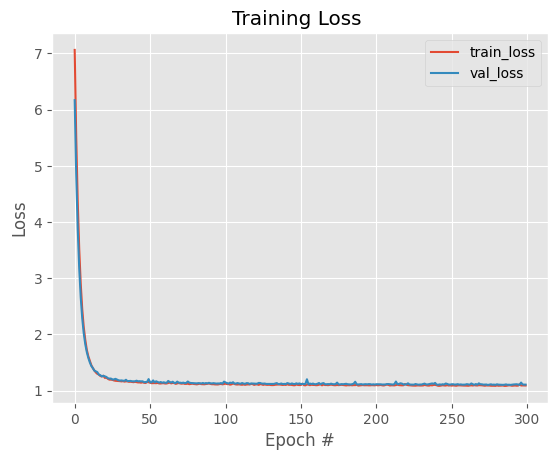

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.0005
num_epochs = 300
batch_size = 120

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(4, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

16/16 [==============================] - 0s 2ms/step
Precisión: 57.31%


In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[109   0   3   0]
 [ 14  16  32  80]
 [ 35   1  78   0]
 [  7  12  32  87]]

Classification report:
              precision    recall  f1-score   support

           0       0.66      0.97      0.79       112
           1       0.55      0.11      0.19       142
           2       0.54      0.68      0.60       114
           3       0.52      0.63      0.57       138

    accuracy                           0.57       506
   macro avg       0.57      0.60      0.54       506
weighted avg       0.56      0.57      0.52       506

Accuracy score: 0.5731


In [ ]:
res_sin = mayor.loc[mayor['bullying'] == 0]
res_1 = mayor.loc[mayor['bullying'] == 1]
res_2 = mayor.loc[mayor['bullying'] == 2]
res_3 = mayor.loc[mayor['bullying'] == 3]

print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/mayor.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/mayor.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/mayor.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/mayor.shape[0])}' )

sin bullying: (12193, 21) 59.00029033194619
con 1 bullying: (1827, 21) 8.840607761540694
con 2 bullying: (5250, 21)25.404045291783607
con 3 bullying: (1396, 21) 6.755056614729507


In [ ]:
def Balance9(df):
  cont=0
  
  cont2=0

  for index, row in df.iterrows():
    if cont < 6450 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
    if cont2 < 2200 and row['bullying']==2 :
        df = df.drop(index)
        cont2+=1
  return df

In [ ]:
df_balanced9 = Balance9(menor)

df_balanced9

,index,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,any_bullying,risk_bullying,bullying
3,22,0,0,1,1,0,0,3,3,3,0,1,4,1,0,0,0,0,1.0,1.0,1
8,39,0,0,1,1,1,0,1,1,3,0,3,3,0,0,0,0,0,1.0,1.0,1
14,48,0,0,1,1,1,0,0,1,3,0,2,2,0,0,0,0,0,1.0,1.0,1
55,121,1,1,1,1,1,0,0,3,1,0,4,4,1,0,0,1,0,1.0,3.0,3
60,128,1,1,1,1,1,11,1,4,3,0,2,3,1,0,0,0,0,1.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32914,56934,0,0,0,1,0,0,1,0,3,0,2,4,0,0,0,1,1,0.0,0.0,0
32916,56939,0,0,0,1,1,0,0,2,3,0,4,2,0,0,0,1,0,0.0,0.0,0
32917,56941,0,0,0,1,0,1,1,1,1,0,2,0,0,0,0,1,0,0.0,0.0,0
32918,56942,1,1,0,1,1,0,0,2,3,9,3,1,0,1,0,1,0,1.0,2.0,2


In [ ]:
res_sin = df_balanced9.loc[df_balanced9['bullying'] == 0]
res_1 = df_balanced9.loc[df_balanced9['bullying'] == 1]
res_2 = df_balanced9.loc[df_balanced9['bullying'] == 2]
res_3 = df_balanced9.loc[df_balanced9['bullying'] == 3]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df_balanced8.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df_balanced9.shape[0])}\ncon 2 bullying: {res_2.shape}{100*(res_2.shape[0]/df_balanced9.shape[0])}\ncon 3 bullying: {res_3.shape} {100*(res_3.shape[0]/df_balanced9.shape[0])}' )

sin bullying: (910, 21) 26.986951364175564
con 1 bullying: (923, 21) 25.483158475980122
con 2 bullying: (969, 21)26.753175041413584
con 3 bullying: (820, 21) 22.639425731639978


In [ ]:
x = df_balanced9.drop(labels=['Bullied_on_school_property_in_past_12_months', 'Cyber_bullied_in_past_12_months','Bullied_not_on_school_property_in_past_12_months','bullying','any_bullying','risk_bullying'], axis=1)
print(x.head())
y=df_balanced9['bullying']
print(y)

    index  Custom_Age  Sex  Physically_attacked  Physical_fighting  \
3      22           1    0                    0                  3   
8      39           1    1                    0                  1   
14     48           1    1                    0                  0   
55    121           1    1                    0                  0   
60    128           1    1                   11                  1   

    Felt_lonely  Close_friends  Miss_school_no_permission  \
3             3              3                          0   
8             1              3                          0   
14            1              3                          0   
55            3              1                          0   
60            4              3                          0   

    Other_students_kind_and_helpful  Parents_understand_problems  \
3                                 1                            4   
8                                 3                            3   
14      

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
num_classes = 4
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

[INFO]: Entrenando red neuronal...
Epoch 1/300
18/18 [==============================] - 2s 16ms/step - loss: 7.7511 - accuracy: 0.2809 - val_loss: 7.5785 - val_accuracy: 0.2500
Epoch 2/300
18/18 [==============================] - 0s 7ms/step - loss: 7.4391 - accuracy: 0.3090 - val_loss: 7.2746 - val_accuracy: 0.2857
Epoch 3/300
18/18 [==============================] - 0s 6ms/step - loss: 7.1419 - accuracy: 0.3256 - val_loss: 6.9854 - val_accuracy: 0.3019
Epoch 4/300
18/18 [==============================] - 0s 6ms/step - loss: 6.8589 - accuracy: 0.3397 - val_loss: 6.7103 - val_accuracy: 0.3084
Epoch 5/300
18/18 [==============================] - 0s 6ms/step - loss: 6.5903 - accuracy: 0.3693 - val_loss: 6.4483 - val_accuracy: 0.3312
Epoch 6/300
18/18 [==============================] - 0s 6ms/step - loss: 6.3349 - accuracy: 0.3776 - val_loss: 6.1991 - val_accuracy: 0.3506
Epoch 7/300
18/18 [==============================] - 0s 6ms/step - loss: 6.0909 - accuracy: 0.3975 - val_loss: 5.9618 

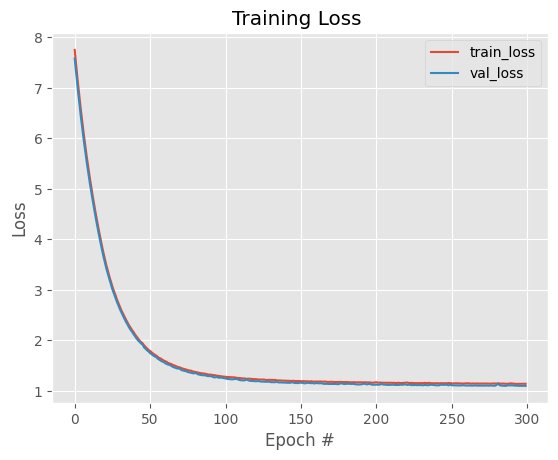

In [ ]:
activation_function_final = 'softmax'
learning_rate = 0.0001
num_epochs = 300
batch_size = 160

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(4, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

17/17 [==============================] - 0s 2ms/step
Precisión: 57.54%


In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[113   0  11   0]
 [ 11  81  39  30]
 [ 38   2  89   2]
 [  6  63  29  30]]

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       124
           1       0.55      0.50      0.53       161
           2       0.53      0.68      0.60       131
           3       0.48      0.23      0.32       128

    accuracy                           0.58       544
   macro avg       0.56      0.58      0.55       544
weighted avg       0.56      0.58      0.55       544

Accuracy score: 0.5754


In [ ]:
def Balance8(df):
  cont=0
  cont1=0
  cont2=0

  for index, row in df.iterrows():
    if cont < 6500 and row['bullying']==0 :
        df = df.drop(index)
        cont+=1
    if cont2 < 2300 and row['bullying']==2 :
        df = df.drop(index)
        cont2+=1
    if cont1 < 100 and row['bullying']==1 :
        df = df.drop(index)
        cont1+=1
  return df